# Visualizations

This notebook contains the visualizations of the data especially price developmemts, eda- developments, fudnamnetal value and volatility

In [1]:
# Imports

import sys, glob, json, re
from pathlib import Path
import numpy as np
import pandas as pd
import neurokit2 as nk
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.colors as mcolors
from datetime import datetime
import math
import statsmodels.formula.api as smf
import random
import seaborn as sns
import os
import itertools
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [2]:
ROOT_DIR = "/Users/johannanagel/Library/CloudStorage/GoogleDrive-nagel.johanna1@gmail.com/Meine Ablage/Masterarbeit_EDA_ECG_Signals/Kopie von Findec ECG_EDA_EEG Data all sessions"
RESULTS = Path("/Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/DataFrames")
ALL_DATA = os.path.join(RESULTS, "all_data_combined.csv")
VISUALIZATION = Path("/Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations")
os.makedirs(VISUALIZATION, exist_ok = True)
DEMOGRAPHICS = os.path.join(RESULTS, "demographics_participant.csv")

In [3]:
df = pd.read_csv(ALL_DATA)
df_demographics = pd.read_csv(DEMOGRAPHICS)

#check nan values
print("NaN - Values: ")
print("\n All - Data:")
print(df.isna().sum()[df.isna().sum()>0])
print("\n Demographics:")
print(df_demographics.isna().sum()[df_demographics.isna().sum()>0])


NaN - Values: 

 All - Data:
window_type                           3352
scr_amplitude                         4475
Optimal_Decision_Guisty               5965
Optimal_Decision_Kirchler             6193
Optimal_Decision_Smith                 929
price_t_minus_1                        411
dividend_t_minus_1                     411
price_t_minus_2                        822
dividend_t_minus_2                     822
price_t_minus_3                       1232
dividend_t_minus_3                    1232
price_t_minus_4                       1640
dividend_t_minus_4                    1640
price_t_minus_5                       2045
dividend_t_minus_5                    2045
V_t                                   2045
MAD_t                                 2045
AMAD_t                                2045
mean_return                           2045
return                                 411
Vol_Classification_Global             2045
Vol_Classification_intra_session      2045
Mean_V_t                 

In [4]:
df_demographics

,session,participant,trading_experience,age,gender,occupation,fatigue_state,final_portfolio,final_wallet,final_money,performance_classification,performance_classification_session_wise,final_earnings_mean,performance_classification_session
0,28-05-2024_14.30 (pre LSL),uspyk0br,3,32,Female,Student,"Okay, somewhat fresh",-5,313.41,243.41,Low Performer,Low Performer,322.42,Medium Performer
1,28-05-2024_14.30 (pre LSL),dzw9hmec,5,24,Male,Student,"Very lively, responsive, but not at peak",-2,677.56,649.56,High Performer,High Performer,322.42,Medium Performer
2,28-05-2024_14.30 (pre LSL),3uuuvlfn,1 - No Experience At All,26,Female,Student,"Okay, somewhat fresh",5,196.97,266.97,Low Performer,Low Performer,322.42,Medium Performer
3,28-05-2024_14.30 (pre LSL),3td05myb,2,29,Female,Student,"Okay, somewhat fresh",15,167.87,377.87,High Performer,High Performer,322.42,Medium Performer
4,14_11_2024,0b8254y9,1 - No Experience At All,20,Male,Student,"Very lively, responsive, but not at peak",1,155.65,169.65,Low Performer,Low Performer,229.92,Low Performer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,03-07-2024_15.15 (pre LSL),rw33oedj,6,28,Male,Student,"Very lively, responsive, but not at peak",8,39.75,151.75,Low Performer,Low Performer,300.97,Medium Performer
85,03-07-2024_15.15 (pre LSL),k7rj36eg,2,21,Female,Student,"Moderately tired, let down",11,236.58,390.58,High Performer,High Performer,300.97,Medium Performer
86,03-07-2024_15.15 (pre LSL),sbnjsla1,1 - No Experience At All,22,Male,Student,"Moderately tired, let down",0,247.36,247.36,Low Performer,Medium Performer,300.97,Medium Performer
87,19_11_2024,r6mbt4v9,2,25,Male,Student,"Okay, somewhat fresh",10,110.31,250.31,Low Performer,Low Performer,322.49,Medium Performer


# Demographic Statistic

In [5]:
exclude_cols = ["final_wallet", "final_portfolio", "participant", "final_money", "final_earnings_mean",  "performance_classification", "performance_classification_session", "performance_classification_session_wise"]

cols_to_plot = [c for c in df_demographics.columns if c not in exclude_cols]

# number of plots next to each other
n_vars = len(cols_to_plot)
n_cols = 3
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 3))
axes = axes.flatten()  

for i, col_name in enumerate(cols_to_plot):
    ax = axes[i]
    counts = df_demographics[col_name].value_counts(dropna=False)

    if col_name in ['gender', 'occupation'] or len(counts) <= 5:
        wedges, texts, autotexts = ax.pie(
            counts,
            labels=counts.index,
            autopct='%1.1f%%',
            startangle=30,
            textprops={'fontsize': 8}
        )
        ax.set_title(f"{col_name.capitalize()}", fontsize=10)
    else:
        sns.countplot(
            data=df_demographics,
            x=col_name,
            ax=ax,
            color="skyblue",
            order=df_demographics[col_name].value_counts().index
        )
        if col_name == "session":
             ax.set_title(f"Number of Participants per Session", fontsize=10)
        else:   
            ax.set_title(f"{col_name.capitalize()}", fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count", fontsize=8)
        ax.tick_params(axis='x', rotation=90, labelsize=7)
        ax.tick_params(axis='y', labelsize=7)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Demographics of Participants", fontsize=14, y=0.99)
plt.tight_layout()
#plt.show()
save_path = VISUALIZATION / "demographics_participant.png"
fig.savefig(save_path)
if os.path.exists(save_path):
    print(f"✅ plot was saved under: {save_path}")
else: 
    print(f"❌ plot was not saved")
plt.close(fig)


✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/demographics_participant.png


# Plot Performance

In [6]:
print(df.columns)

Index(['session', 'participant', 'round', 'price', 'transaction',
       'window_type', 'scl_mean', 'scl_std', 'scr_amplitude', 'scr_auc',
       ...
       'gender', 'occupation', 'fatigue_state', 'final_portfolio',
       'final_wallet', 'final_money', 'performance_classification',
       'performance_classification_session_wise', 'final_earnings_mean',
       'performance_classification_session'],
      dtype='object', length=137)


In [7]:
#Plotting with boxplot the final performance of participant and session in combination with risk. Looking if there might be insights in performance and risk behavior. 



col_needed = ["session","participant","final_money", "final_earnings_mean",
              "performance_classification", #global performance classification
              "performance_classification_session_wise", #performance classifation of participant in one session
              "performance_classification_session", # perfomance classification of a session
              "gender",
              "p_Risk_Smith_categorization_average",
              "p_Risk_Guisty_categorization_average",
              "p_Risk_Kirchler_categorization_average", 
              "s_Risk_Smith_categorization_average",
              "s_Risk_Guisty_categorization_average",
              "s_Risk_Kirchler_categorization_average"]
df_performance = df[col_needed].drop_duplicates()

performance = [["performance_classification","performance_classification_session_wise","performance_classification_session"]]
for per in performance:
    df_performance[per] = (
        df_performance[per]
        .replace({
            "Low Performer": "low",
            "Medium Performer": "medium",
            "High Performer": "high"
        })
    )

risk_groups = {
    "p_Risk": [ # risk categories of participants
        "p_Risk_Smith_categorization_average",
        "p_Risk_Guisty_categorization_average",
        "p_Risk_Kirchler_categorization_average"
    ],
    "s_Risk": [ # risk categories of session
        "s_Risk_Smith_categorization_average",
        "s_Risk_Guisty_categorization_average",
        "s_Risk_Kirchler_categorization_average"
    ]
}



for risk_group_name, risk_cols in risk_groups.items():
    if risk_group_name == "s_Risk":
        perf_vars = [("performance_classification_session", "Performance Classification (Session)"), ("final_earnings_mean", "Median Earnings")]


    else: 
        perf_vars = [
            ("final_money", "Final Money"),
            ("performance_classification", "Performance Classification"),
            ("performance_classification_session_wise", "Performance Classification (Session-wise)") ]
    for perf_col, perf_label in perf_vars:
        fig, axes = plt.subplots(1, len(risk_cols), figsize=(6 * len(risk_cols), 4))
        axes = np.atleast_1d(axes)

        for i, risk_col in enumerate(risk_cols):
            ax = axes[i] 
            sns.boxplot(data=df_performance, x=risk_col, y=perf_col, ax=ax)
            sns.stripplot(
                    data=df_performance,
                    x=risk_col,
                    y=perf_col,
                    ax=ax,
                    dodge=True,
                    jitter=True,
                    alpha=0.6
            )
            if i == 0:
                ax.set_ylabel(perf_label)
            else:
                ax.set_ylabel("")

            ax.set_title(f"{perf_label} for each risk group\n({risk_col})")
            ax.set_xlabel("Risk")
            
            
        save_path = VISUALIZATION / f"performance_{perf_col}.png"
        fig.savefig(save_path)
        if os.path.exists(save_path):
            print(f"✅ plot was saved under: {save_path}")
        else: 
            print(f"❌ plot was not saved")

        plt.tight_layout()
        #plt.show()
        plt.close(fig)





✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/performance_final_money.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/performance_performance_classification.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/performance_performance_classification_session_wise.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/performance_performance_classification_session.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/performance_final_earnings_mean.png


# EDA-Signal

In [8]:
EDA_COLUMNS = ["session", "participant", "round", "price",  "scl_mean", "scl_std", "scr_amplitude", "scr_auc", "scr_count", "scr_per_sec", "signal_range", "signal_std", "window_type"]
df_eda = df[EDA_COLUMNS]

In [9]:
# each round (decision) consists of  decision 5 phases (1 round = 5 phases)
# Conting each phases as a time index ( 40 rounds * 5 phases = time_index of 5 )
# is used for better visualization of the data

window_order = df_eda.window_type.unique()
df_eda["window_num"] = df_eda["window_type"].map({name: i+1 for i, name in enumerate(window_order)})

df_eda["time_index"] = (df_eda["round"] - 1) * len(window_order) + df_eda["window_num"]


df_eda

,session,participant,round,price,scl_mean,scl_std,scr_amplitude,scr_auc,scr_count,scr_per_sec,signal_range,signal_std,window_type,window_num,time_index
0,14_11_2024,0b8254y9,1,14.09,0.217251,0.018766,0.179607,0.385015,1,0.2,0.067279,0.018766,pre_decision,1,1
1,14_11_2024,0b8254y9,1,14.09,0.102223,0.040285,NaN,0.003133,0,0.0,0.135783,0.040285,during_decision,2,2
2,14_11_2024,0b8254y9,1,14.09,0.000628,0.011225,0.002189,0.002134,1,0.2,0.038088,0.011225,NaN,3,3
3,14_11_2024,0b8254y9,1,14.09,-0.045347,0.011444,NaN,0.000000,0,0.0,0.039005,0.011444,during_feedback,4,4
4,14_11_2024,0b8254y9,1,14.09,-0.071926,0.002382,0.003833,0.002936,1,0.2,0.008114,0.002382,post_feedback,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15692,29-05-2024_15.30 (pre LSL),k9j9nh9y,36,15.70,-3.921180,0.011531,0.029694,0.026078,1,0.2,0.038025,0.011531,during_feedback,4,179
15693,29-05-2024_15.30 (pre LSL),k9j9nh9y,37,15.12,-3.691538,0.024752,NaN,0.057201,0,0.0,0.086134,0.024752,during_feedback,4,184
15694,29-05-2024_15.30 (pre LSL),k9j9nh9y,38,14.87,-4.287429,0.036498,NaN,0.039047,0,0.0,0.125824,0.036498,during_feedback,4,189
15695,29-05-2024_15.30 (pre LSL),k9j9nh9y,39,13.97,0.966847,2.103670,NaN,0.000000,0,0.0,7.165043,2.103670,during_feedback,4,194


In [10]:
# Plotting for each participant each eda signal in a grid format.

metrics = ["scr_auc","scr_per_sec", "scr_count", "scr_amplitude", "scl_mean", "scl_std"]
participants = df_eda["participant"].unique()
cols = 2                       
rows = math.ceil(len(participants) / cols)

for eda in metrics:
    print(eda)

    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 3.3*rows), sharex=True)
    axes = axes.flatten()
    ax2_refs = []

    for i, p in enumerate(participants):
        ax = axes[i]
        sub = df_eda[df_eda["participant"] == p].sort_values("time_index")
        ax.tick_params(labelbottom=True)
  
        ax.plot(sub["time_index"], sub[eda], label=eda)
        ax.set_title(str(p))
        round_ticks = sub.groupby("round")["time_index"].min().values
        ax.set_xticks(round_ticks[::5])               # every 5th round
        ax.set_xticklabels(sub["round"].unique()[::5])
        ax.set_xlabel("Round")
        ax.set_ylabel(eda)


        ax2 = ax.twinx()
        ax2.plot(sub["time_index"], sub["price"], linestyle="--", alpha=0.8, label="price", color="green")
        ax2.set_ylabel("price")
        ax2_refs.append(ax2)


    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])


    h1, l1 = axes[0].get_legend_handles_labels()
    h2, l2 = ax2_refs[0].get_legend_handles_labels()
    fig.legend(h1 + h2, l1 + l2, loc="upper center", ncol=2)
    
    plt.tight_layout()
    save_path = VISUALIZATION / f"eda_price_{eda}.png"
    fig.savefig(save_path)
    if os.path.exists(save_path):
        print(f"✅ plot was saved under: {save_path}")
    else: 
        print(f"❌ plot was not saved")

    
    #plt.show()
    plt.close(fig)


scr_auc
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scr_auc.png
scr_per_sec
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scr_per_sec.png
scr_count
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scr_count.png
scr_amplitude
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scr_amplitude.png
scl_mean
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scl_mean.png
scl_std
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/eda_price_scl_std.png


# Price development

In [11]:
df_price = df[["session","round", "price", "sell_count", "n_participants"]].drop_duplicates().sort_values(["session", "round"])

In [12]:
def visulaize_price_developmemts(df, Path):
    """ 
        Plotting the price development of each session.capitalize
        Each session in one plot (inclusive the median)
    """
    fig = plt.figure(figsize=(10,6))
    
    for session, group in df.groupby("session"):
        if session == "Median": 
             plt.plot(
                group["round"], 
                group["price"],
                label=f"Session {session}",
                linewidth=1.2, 
                linestyle="--",
                color="black" )
        else: 
            plt.plot(
                group["round"], 
                group["price"], 
                label=f"Session {session}", 
                alpha=0.7
            )
    
    plt.xlabel("Round")
    plt.ylabel("Price")
    plt.title("Price Development of all Sessions")
    plt.legend(title="Session", bbox_to_anchor=(1.05, 1.0), loc="upper left")
    plt.tight_layout()
    #plt.show()
    fig.savefig(Path, dpi=300) 
    plt.close()

def plot_price_and_sells_per_round_colored(
    df_rounds: pd.DataFrame,
    Path: str,
    ncols: int = 3,
    show_rugs: bool = True,     # red line on y=0 for round without sells 
    sharex: bool = False,
    sharey_price: bool = False,
):
    """

    Draws a FacetGrid: one subplot per session
        - Price (y) over rounds (x) as points, color-coded:
            blue  = sell_count > 0
            red   = sell_count == 0
        plus a subtle price line (dashed)
        - # of sells as a separate line on the right y-axis
        - red rug marks at y=0 for no-sells
    """

    need = {"session", "round", "price", "sell_count"}
    miss = need - set(df_rounds.columns)
    if miss:
        raise ValueError(f"Fehlende Spalten: {sorted(miss)}")

    df = df_rounds.copy()
    # Numerisch casten und säubern
    df["round"] = pd.to_numeric(df["round"], errors="coerce")
    df["price"] = pd.to_numeric(df["price"], errors="coerce")
    df["sell_count"] = pd.to_numeric(df["sell_count"], errors="coerce")
    df = df.dropna(subset=["round", "price", "sell_count"])
    df = df.sort_values(["session", "round"])

    sessions = list(pd.unique(df["session"]))
    if not sessions:
        raise ValueError("No session founds gefunden.")

    n = len(sessions)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(
        nrows=nrows, ncols=ncols,
        figsize=(6.5*ncols, 4.2*nrows),
        sharex=sharex, sharey=sharey_price
    )

    
    if isinstance(axes, plt.Axes):
        axes = np.array([[axes]])
    else:
        axes = np.atleast_2d(axes)

    # element of the legend
    legend_items = {
        "Price (sells)": Line2D([0],[0], marker='o', color='none',
                                markerfacecolor='skyblue', markeredgecolor='black',
                                markersize=6, label="Price (sells)"),
        "Price (no sells)": Line2D([0],[0], marker='o', color='none',
                                   markerfacecolor='red', markeredgecolor='black',
                                   markersize=6, label="Price (no sells)"),
        "# Sells": Line2D([0],[0], color='C3', marker='s', linewidth=1.6, markersize=4, label="# Sells"),
        "Price trend": Line2D([0],[0], color='gray', linestyle='--', linewidth=1.2, label="Price trend"),
    }
    if show_rugs:
        legend_items["0 sells (rug)"] = Line2D([0],[0], marker='_', color='red', linestyle='None', markersize=12, label="0 sells (rug)")

    for idx, session in enumerate(sessions):
        r, c = divmod(idx, ncols)
        ax_price = axes[r, c]

        sub = df[df["session"] == session].sort_values("round")
        if sub.empty:
            ax_price.axis("off")
            continue

    
        ax_price.axhline(0, color="lightgray", linewidth=1)

        # price trend line
        ax_price.plot(sub["round"], sub["price"],
                      linestyle="--", linewidth=1.2, color="gray", alpha=0.9)

        # Coloring sell or no-stell data
        colors = np.where(sub["sell_count"] == 0, "red", "skyblue")
        ax_price.scatter(sub["round"], sub["price"],
                         s=50, c=colors, edgecolors="black", linewidths=0.5, zorder=3)

        # Optional: Rugs (red line) on y=0 if No-Sells
        if show_rugs:
            no_sell_rounds = sub.loc[sub["sell_count"] == 0, "round"].to_numpy()
            if no_sell_rounds.size > 0:
                ax_price.scatter(no_sell_rounds, np.zeros_like(no_sell_rounds),
                                 marker="_", s=260, color="red", zorder=4)

        
        ax_sells = ax_price.twinx()
        ax_sells.plot(sub["round"], sub["sell_count"],
                      color="C3", linewidth=1.6, marker="s", markersize=4, alpha=0.9)

       
        ax_price.set_title(f"Session {session}")
        ax_price.set_xlabel("Round")
        ax_price.set_ylabel("Price")
        ax_sells.set_ylabel("# Sells", color="C3")
        ax_sells.tick_params(axis="y", labelcolor="C3")

        ymax = float(sub["price"].max())
        ax_price.set_ylim(-1, ymax * 1.08)      
        ax_price.grid(True, axis="y", linestyle=":", alpha=0.25)

    # remove cells who are not needed 
    total = nrows * ncols
    for k in range(n, total):
        r, c = divmod(k, ncols)
        fig.delaxes(axes[r, c])


    fig.legend(legend_items.values(), legend_items.keys(),
               loc="upper center", ncol=min(5, len(legend_items)), frameon=False)

    fig.tight_layout(rect=[0, 0, 1, 0.99])
    fig.savefig(Path, dpi=300) 
    #plt.show()
    plt.close()

def plot_small_big_sessions(df_with_avg, stats, max_session, avg_price, path):
    """
        Plot price developments of session with the biggest and the smallest median
    """
    sessions_to_plot = [
        stats.iloc[0]["session"],                # smallest Median
        stats.iloc[len(stats)//2]["session"],  #  Median
        stats.iloc[-1]["session"],               # biggest Median
        avg_price.iloc[0]["session"],
        max_session.iloc[-1]["session"], 

    ]
    print(sessions_to_plot)
    # Schritt 2: Plotten
    fig = plt.figure(figsize=(8,4))

    for session, group in df_with_avg[df_with_avg["session"].isin(sessions_to_plot)].groupby("session"):
        plt.plot(group["round"], group["price"], label=f"Session {session}")

    plt.xlabel("Round")
    plt.ylabel("Price")
    plt.title("Price development: small, middle und big Median, Median-Session, Session with biggest price")
    plt.legend(title="Session")
    plt.tight_layout()
    fig.savefig(path, dpi=300)
    #plt.show()
    plt.close()

def plot_smallest_or_biggest_sessions(df, path, title):
    """
        Plot the price development of the session with the highest or smallest price
    """
    fig = plt.figure(figsize = (8,4))
    for session, group in df.groupby("session"):
        plt.plot(group["round"], group["price"], label=f"Session {session}")

    plt.xlabel("Round")
    plt.ylabel("Price")
    plt.title(f"Price development: {title}")
    plt.legend(title="Session")
    plt.tight_layout()
    fig.savefig(path, dpi=300)
    # plt.show()
    plt.close()

    



In [13]:
df_price[df_price["session"] == "20-08-2024_13.45(no fMRI)"]

,session,round,price,sell_count,n_participants
3287,20-08-2024_13.45(no fMRI),1,16.97,1,5
3292,20-08-2024_13.45(no fMRI),2,18.52,2,5
3297,20-08-2024_13.45(no fMRI),3,19.26,0,5
3302,20-08-2024_13.45(no fMRI),4,21.43,1,5
3307,20-08-2024_13.45(no fMRI),5,23.37,1,5
3311,20-08-2024_13.45(no fMRI),6,24.74,0,5
3456,20-08-2024_13.45(no fMRI),7,26.07,0,4
3316,20-08-2024_13.45(no fMRI),8,30.19,0,5
3321,20-08-2024_13.45(no fMRI),9,36.85,0,5
3324,20-08-2024_13.45(no fMRI),10,41.69,1,5


In [14]:
#calc the median price development of all sessions
avg_price = (
    df_price.groupby("round")["price"]
      .median() #robust against outlier
      .reset_index(name="price")
)



avg_price["session"] = "Median"
avg_price["sell_count"] = 0
avg_price["n_participants"] = 0

avg_price = avg_price[["session", "round", "price","sell_count", "n_participants"]]


df_with_avg = pd.concat([df_price, avg_price], ignore_index=True)

print(df_with_avg.tail().head())



# Plotting the price developments of all sessions
saving_path = os.path.join(VISUALIZATION, "price_development_all_sessions.png") 
visulaize_price_developmemts(df_with_avg, saving_path)

path_price_sells = os.path.join(VISUALIZATION, "price_development_price_sells_round_all_sessions.png") 
plot_price_and_sells_per_round_colored(df_price, path_price_sells , ncols=3, show_rugs=True)


def calculate_price_mean_std(df):
    stats = (
    df.groupby("session")["price"]
      .agg(["mean", "median", "std", "min", "max", ])
      .reset_index()
    )

    return stats

# Plotting the session with the biggest and smallest median
stats = calculate_price_mean_std(df_price)
stats = stats.sort_values(by=["median"] )
new_stats = stats.sort_values(by=["max"] )

path_small_biggest = os.path.join(VISUALIZATION,"price_development_smallest_middlest_biggest_average.png")
plot_small_big_sessions(df_with_avg, stats, new_stats,avg_price,path_small_biggest )


###  Plotting the 5 sessions of the highest or smallest mean

maxprice = df_price.groupby(["session"])["price"].max().sort_values(ascending= True)
df_small = maxprice.head(5).reset_index()
df_big = maxprice.tail(5).reset_index()
#df_small_big = pd.concat([df_big, df_small]).reset_index()
rows_small = []
for idx, row in df_price.iterrows():
    if row["session"] in df_small["session"].values:
        rows_small.append(row)
df_price_small = pd.DataFrame(rows_small)

rows_big = []
for idx, row in df_price.iterrows():
    if row["session"] in df_big["session"].values:
        rows_big.append(row)
df_price_big = pd.DataFrame(rows_big)

path_small = os.path.join(VISUALIZATION,"price_small.png")
path_big = os.path.join(VISUALIZATION,"price_big.png")
plot_smallest_biggest_sessions = plot_smallest_or_biggest_sessions(df_price_small, path_small, "Min Max prices")
plot_smallest_biggest_sessions = plot_smallest_or_biggest_sessions(df_price_big, path_big, "Max Max price")




    session  round  price  sell_count  n_participants
875  Median     36  20.53           0               0
876  Median     37  18.33           0               0
877  Median     38  18.30           0               0
878  Median     39  18.66           0               0
879  Median     40  16.74           0               0
['21_11_2024 (no fMRI) ', '02-07-2024_14.15 (pre LSL)', '20-08-2024_13.45(no fMRI)', 'Median', '27-08-2024_13.45']


# Fundamental Value

In [15]:
# Visualize the fundamental values over 40 rounds by SMITH, GIUSTY, KIRCHLER

df_fv = df[[ "round", "FV_SMITH","FV_GUISTY", "FV_KIRCHLER"]].drop_duplicates().sort_values([ "round"])

path_FV = os.path.join(VISUALIZATION, "fundamental_vale.png") 

fig = plt.figure(figsize=(6,4))

plt.plot(df_fv["round"], df_fv["FV_SMITH"], label="FV (SMITH 2014)", linewidth=2)
plt.plot(df_fv["round"], df_fv["FV_GUISTY"], label="FV (Guisty (2016))", linewidth=2)
plt.plot(df_fv["round"], df_fv["FV_KIRCHLER"], label="FV (Kirchler (2012))", linewidth=2)


for session, group in df_with_avg[df_with_avg["session"] == "Median"].groupby("session"):
    plt.plot(group["round"], group["price"], label=f"Price {session}")


plt.xlabel("Round")
plt.ylabel("Fundamental Value")
plt.title("Fundamental Values")
plt.legend(loc='upper right', framealpha=0.7, bbox_to_anchor=(1, 0.87) )
plt.grid(True)
plt.tight_layout()
plt.savefig(path_FV,dpi=300)
#plt.show()
plt.close()

# Cash/Asset Ratio

In [16]:


def plot_three_cash_asset_ratios(df, pdf_path):
    "Plotting C/A Ratio of all sessions by using the FV of the three researcher"

    plt.rcParams.update({
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "font.size": 4,
        "axes.labelsize": 4,
        "axes.titlesize": 4,
        "legend.fontsize": 4,
        "xtick.labelsize": 4,
        "ytick.labelsize": 4,
        "lines.linewidth": 0.9, 
    })

    sessions = df["session"].drop_duplicates().tolist()

    with PdfPages(pdf_path) as pdf:
        # title page
        fig = plt.figure(figsize=(8.5, 5.5))
        plt.axis("off")
        plt.text(0.5, 0.6, "Vergleich der Cash/Asset Ratios pro Session", 
                 ha="center", va="center", fontsize=18)
        plt.text(0.5, 0.45, f"Anzahl Sessions: {len(sessions)}", 
                 ha="center", va="center", fontsize=12)
        pdf.savefig(fig, bbox_inches="tight")
        plt.close(fig)

        # Colors and labels 
        ratio_cols = {
            "cash_asset_ratio_KIRCHLER": "Kirchler et al.",
            "cash_asset_ratio_GUISTY": "Giusti et al.",
            "cash_asset_ratio_SMITH": "Smith et al."
        }

        colors = {
            "cash_asset_ratio_KIRCHLER": "#1f77b4",  # blue
            "cash_asset_ratio_GUISTY": "#2ca02c",    # green
            "cash_asset_ratio_SMITH": "#d62728",     # red
        }
        
        # Overview over all sessions
        fig, ax = plt.subplots(figsize=(2.5, 1.5))
        for col, label in ratio_cols.items():
            for s in sessions:
                tmp = df[df["session"] == s].sort_values("round")
                ax.plot(tmp["round"], tmp[col], alpha=0.4, color=colors[col])
            ax.plot([], [], color=colors[col], label=label)  
        ax.set_title("Cash/Asset Ratios – Übersicht über alle Sessions")
        ax.set_xlabel("Rounds")
        ax.set_ylabel("Cash/Asset Ratio")
        ax.grid(True, alpha=0.3)
        ax.legend(
                loc="best", frameon=False, handlelength=1.2,
                borderpad=0.2, labelspacing=0.15, handletextpad=0.3
            )
        pdf.savefig(fig, bbox_inches="tight")
        #plt.show()
        plt.close(fig)

    print(f"✅ Saving all plots in in: {pdf_path}")



df_cashA= df[["session", "round", "cash_asset_ratio_KIRCHLER", "cash_asset_ratio_GUISTY", "cash_asset_ratio_SMITH"]].drop_duplicates().sort_values(["session", "round"])
saving_path_CA = os.path.join(VISUALIZATION, "Cash_Asset_Ratio.pdf") 
#calling the C/A Visualization method
plot_three_cash_asset_ratios(df_cashA, saving_path_CA)


✅ Saving all plots in in: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Cash_Asset_Ratio.pdf


In [17]:

def plot_cash_asset_ratios_per_session(
    df,
    pdf_path,
    grayscale=False
):
    """
    Plotting for each sesssion the Cash/Asset Ratio 
    """


   
    plt.rcParams.update({
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "font.size": 4,
        "axes.labelsize": 4,
        "axes.titlesize": 4,
        "legend.fontsize": 4,
        "xtick.labelsize": 4,
        "ytick.labelsize": 4,
        "lines.linewidth": 0.9,  
    })

    
    if grayscale:
        colors = {
            "cash_asset_ratio_KIRCHLER": "k",
            "cash_asset_ratio_GUISTY": "0.4",
            "cash_asset_ratio_SMITH": "0.7",
        }
        linestyles = {
            "cash_asset_ratio_KIRCHLER": "-",
            "cash_asset_ratio_GUISTY": "--",
            "cash_asset_ratio_SMITH": "-.",
        }
    else:
        colors = {
            "cash_asset_ratio_KIRCHLER": "#1f77b4",  # blue
            "cash_asset_ratio_GUISTY": "#2ca02c",    # green
            "cash_asset_ratio_SMITH": "#d62728",     # red
        }
        linestyles = {k: "-" for k in colors}

    labels = {
        "cash_asset_ratio_KIRCHLER": "Kirchler",
        "cash_asset_ratio_GUISTY": "Giusti",
        "cash_asset_ratio_SMITH": "Smith"
    }

    sessions = df["session"].drop_duplicates().tolist()
    ratio_cols = list(labels.keys())

    meta = {
        "Title": "Mini Clean Cash/Asset Ratios per Session",
        "Author": "Generated for Master's Thesis",
        "CreationDate": datetime.now(),
    }

    
    tiny_size = (2.5, 1.5) 

    with PdfPages(pdf_path) as pdf:
        pdf.infodict().update(meta)

        for s in sessions:
            tmp = df[df["session"] == s].sort_values("round")

            fig, ax = plt.subplots(figsize=tiny_size, constrained_layout=True)

            
            for col in ratio_cols:
                ax.plot(
                    tmp["round"], tmp[col],
                    color=colors[col],
                    linestyle=linestyles[col],
                    label=labels[col]
                )

            
            ax.set_title(f"Session {s}", pad=2)
            ax.set_xlabel("Rounds")
            ax.set_ylabel("C/A Ratio")
            ax.grid(True, alpha=0.2)
            ax.legend(
                loc="best", frameon=False, handlelength=1.2,
                borderpad=0.2, labelspacing=0.15, handletextpad=0.3
            )
            pdf.savefig(fig, bbox_inches="tight")
            #plt.show()
            plt.close(fig)

    print(f"✅ Saving in : {pdf_path}")




#calling method for plotting all C/A ratios for each session
saving_path_CA_each_session = os.path.join(VISUALIZATION, "Cash_Asset_Ratio_each_session.pdf") 
plot_cash_asset_ratios_per_session(df_cashA, saving_path_CA_each_session)


✅ Saving in : /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Cash_Asset_Ratio_each_session.pdf


In [18]:

def plot_price_minus_FV_tiny_clean(
    df,
    output_dir,
    grayscale=False,
    file_format="png"
):
    """
    Plotting the deviation of price minus FV for each session
    and saving each session as a separate figure file.
    """


    os.makedirs(output_dir, exist_ok=True)

    plt.rcParams.update({
        "figure.dpi": 300,
        "savefig.dpi": 300,
        "font.size": 4,
        "axes.labelsize": 4,
        "axes.titlesize": 4,
        "legend.fontsize": 4,
        "xtick.labelsize": 4,
        "ytick.labelsize": 4,
        "lines.linewidth": 0.9,
    })

    color = "k" if grayscale else "#1f77b4"
    linestyle = "-"

    sessions = df["session"].drop_duplicates().tolist()
    tiny_size = (2.0, 1.0)  # wie vorher

    for s in sessions:
        tmp = df[df["session"] == s].sort_values("round")

        fig, ax = plt.subplots(figsize=tiny_size, constrained_layout=True)

        ax.plot(
            tmp["round"], tmp["price_minus_FV"],
            color=color,
            linestyle=linestyle,
        )

        ax.axhline(0, color="gray", linewidth=0.6, linestyle="--", alpha=0.7)
        ax.set_title(f"Session {s}", pad=2)
        ax.set_xlabel("Round")
        ax.set_ylabel("Price − FV")
        ax.grid(True, alpha=0.25)

        # Dateiname für diese Session
        filename = f"price_minus_FV_session_{s}.{file_format}"
        save_path = os.path.join(output_dir, filename)

        fig.savefig(save_path, bbox_inches="tight")
        plt.close(fig)

        print(f"✅ Saved plot for session {s} at: {save_path}")

    print(f"🎯 All session plots saved in: {output_dir}")


df_price_minus_fv = df[["session", "round", "price", "price_minus_FV"]].drop_duplicates().sort_values(["session", "round"])
output_dir_price_minus_FV = os.path.join(VISUALIZATION, "Price_minus_FV_sessions")
plot_price_minus_FV_tiny_clean(df_price_minus_fv, output_dir_price_minus_FV, grayscale=False, file_format="png")

✅ Saved plot for session 02-07-2024_14.15 (pre LSL) at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Price_minus_FV_sessions/price_minus_FV_session_02-07-2024_14.15 (pre LSL).png
✅ Saved plot for session 02-07-2024_16.30 (pre LSL) at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Price_minus_FV_sessions/price_minus_FV_session_02-07-2024_16.30 (pre LSL).png
✅ Saved plot for session 03-07-2024_15.15 (pre LSL) at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Price_minus_FV_sessions/price_minus_FV_session_03-07-2024_15.15 (pre LSL).png
✅ Saved plot for session 06-08-2024_13.15 at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Price_minus_FV_sessions/price_minus_FV_session_06-08-2024_13.15.png
✅ Saved plot for session 07_11_2024 at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualiza

In [19]:

def _plot_grid_for_fv(df, fv_key, path, cols=2, figsize_single=(6,3)):
    """
    Plotting the Relative Deaviation and Relatvie Absolute Deviation of each session in one grid cell
    """
    fv_key_up = fv_key.upper()
    assert fv_key_up in {"GUISTY", "KIRCHLER", "SMITH"}

    #Basic cols
    for base in ["session", "round", "price"]:
        if base not in df.columns:
            raise KeyError(f"Pflichtspalte '{base}' fehlt im DataFrame.")

    
    fv_candidates  = [f"FV_{fv_key_up}"]
    if fv_key_up == "GUISTY":
        rd_candidates  = ["rd_GUISTY_per_round"]
        rad_candidates = ["rad_GUISTY_per_round"]
    elif fv_key_up == "KIRCHLER":
        rd_candidates  = [ "rd_Kirchler_per_round"]
        rad_candidates = ["rad_Kirchler_per_round"]
    else:
        rd_candidates = [ "rd_Smith_per_round"]
        rad_candidates = ["rad_Smith_per_round"]

    fv_col  = fv_candidates
    rd_col  = rd_candidates
    rad_col = rad_candidates

    #os.makedirs(outdir, exist_ok=True)

    sessions = sorted(df["session"].unique())
    rows = math.ceil(len(sessions) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*figsize_single[0], rows*figsize_single[1]), squeeze=False)
    fig.suptitle(f"{fv_key_up}: Price, FV, RD & RAD über alle Sessions", fontsize=12, y=0.99)

    for idx, sess in enumerate(sessions):
        r, c = divmod(idx, cols)
        ax1 = axes[r, c]
        grp = df[df["session"] == sess].sort_values("round")

        
        p1, = ax1.plot(grp["round"], grp["price"], color="tab:blue", linewidth=1.5, label="Price")
        fv1, = ax1.plot(grp["round"], grp[fv_col],  color="tab:green", linestyle="--", linewidth=1.5, label=f"{fv_col}")
        ax1.set_title(f"Session {sess}", fontsize=9)
        ax1.set_xlabel("Round")
        ax1.set_ylabel("Price / FV", fontsize=8)
        ax1.grid(True, linestyle=":", alpha=0.5)

        
        ax2 = ax1.twinx()
        d1, =  ax2.plot(grp["round"], grp[rd_col],  color="tab:red", linewidth=1.5, label="RD")
        d2, = ax2.plot(grp["round"], grp[rad_col], color="tab:orange", linestyle=":", linewidth=1.5, label="RAD")
        ax2.axhline(0, color="gray", linestyle="--", linewidth=1, alpha=0.6)
        ax2.set_ylabel("RD / RAD", fontsize=8)

    # Remove empty cols
    total = rows * cols
    for i in range(len(sessions), total):
        r, c = divmod(i, cols)
        axes[r, c].axis("off")
    
    handles = [p1, fv1, d1, d2]     
    labels  = ["Price", f"FV ({fv_key_up})", "RD", "RAD"]
    fig.legend(handles, labels,
           loc="upper center", ncol=2, frameon=True, fontsize=9,
           bbox_to_anchor=(0.5, 0.978), borderaxespad=0.2)
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    
    fname = f"{path}/{fv_key_up}_grid.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    #plt.show()
    plt.close()
    print(f"✅ Gespeichert: {fname}")

def plot_all_sessions_grid(df, path, cols=2, figsize_single=(6,3)):
    if "FV_GUISTY" in df.columns:
        _plot_grid_for_fv(df, "GUISTY", path, cols=cols, figsize_single=figsize_single)
    if "FV_KIRCHLER" in df.columns:
        _plot_grid_for_fv(df, "KIRCHLER", path, cols=cols, figsize_single=figsize_single)
    if "FV_SMITH" in df.columns:
        _plot_grid_for_fv(df, "SMITH", path, cols=cols, figsize_single=figsize_single)



df_rad = df[["session", "round", "price", "FV_GUISTY","FV_KIRCHLER","FV_SMITH",  "rd_Smith_per_round", "rad_Smith_per_round","rd_Kirchler_per_round", "rad_Kirchler_per_round", "rad_GUISTY_per_round", "rd_GUISTY_per_round"]].copy().drop_duplicates().sort_values(["session", "round"])

plot_all_sessions_grid(df_rad, VISUALIZATION, cols=2, figsize_single=(5,2.5))

✅ Gespeichert: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/GUISTY_grid.png
✅ Gespeichert: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/KIRCHLER_grid.png
✅ Gespeichert: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/SMITH_grid.png


In [20]:
def plot_combined_rd_rad(df, path, cols=2, figsize_single=(5, 2.7)):
    """
    Plot RD & RAD for Guisty, Kirchler, Smith in one figure per session (grid).
    Includes a small overall title per figure.
    """

    g_rd  = "rd_GUISTY_per_round"
    g_rad = "rad_GUISTY_per_round"
    k_rd  = "rd_Kirchler_per_round"
    k_rad = "rad_Kirchler_per_round"
    l_rd  = "rd_Smith_per_round"
    l_rad = "rad_Smith_per_round"

    if "session" not in df.columns or "round" not in df.columns:
        raise KeyError("Columns 'session' and 'round' are required.")


    sessions = sorted(df["session"].unique())
    rows = math.ceil(len(sessions) / cols)

    fig, axes = plt.subplots(
        rows, cols,
        figsize=(cols * figsize_single[0], rows * figsize_single[1]),
        squeeze=False
    )

   
    fig.suptitle(
        "Combined RD & RAD – Guisty & Kirchler & Smith",
        fontsize=12,
        y=0.99,
        fontweight="bold"
    )

    handles, labels = None, None

    for idx, sess in enumerate(sessions):
        r, c = divmod(idx, cols)
        ax = axes[r, c]
        grp = df[df["session"] == sess].sort_values("round")

        # Guisty
        g1, = ax.plot(grp["round"], grp[g_rd],  linewidth=1.6, label="RD (Guisty)")
        g2, = ax.plot(grp["round"], grp[g_rad], linestyle=":", linewidth=1.6, label="RAD (Guisty)")

        # Kirchler
        k1, = ax.plot(grp["round"], grp[k_rd],  linewidth=1.6, label="RD (Kirchler)")
        k2, = ax.plot(grp["round"], grp[k_rad], linestyle=":", linewidth=1.6, label="RAD (Kirchler)")

        # Smith
        l1, = ax.plot(grp["round"], grp[l_rd],  linewidth=1.6, label="RD (Smith)")
        l2, = ax.plot(grp["round"], grp[l_rad], linestyle=":", linewidth=1.6, label="RAD (Smith)")

        ax.axhline(0, linestyle="--", linewidth=1, alpha=0.7)
        ax.set_title(f"Session {sess}", fontsize=9, pad=2)
        ax.set_xlabel("Round", fontsize=8)
        ax.set_ylabel("RD / RAD", fontsize=8)
        ax.grid(True, linestyle=":", alpha=0.6)

        if handles is None:
            handles, labels = [g1, g2, k1, k2, l1, l2], [
                "RD (Guisty)", "RAD (Guisty, dotted)",
                "RD (Kirchler)", "RAD (Kirchler, dotted)",
                "RD (Smith)", "RAD (Smith, dotted)"
            ]

    total = rows * cols
    for i in range(len(sessions), total):
        r, c = divmod(i, cols)
        axes[r, c].axis("off")

    if handles:
        fig.legend(
            handles, labels,
            loc="upper center",
            ncol=2,
            frameon=True,
            fontsize=9,
            bbox_to_anchor=(0.5, 0.978),
            borderaxespad=0.2
        )

    plt.tight_layout(pad=0.8, rect=[0, 0, 1, 0.96])


    plt.savefig(path, dpi=300, bbox_inches="tight")
    #plt.show()
    plt.close()
    print(f"✅ Saved: {path}")

path = VISUALIZATION / "Combined_RD_RAD-Guisty_Kirchler_Smith.png"
plot_combined_rd_rad(df_rad,path, cols=2, figsize_single=(5, 2.7))

✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Combined_RD_RAD-Guisty_Kirchler_Smith.png


In [21]:
import os
import random
import math
import matplotlib.pyplot as plt

def plot_combined_rd_rad_grid(df, out_path, required_sessions, n_total=4, figsize_single=(5, 2.7)):
    """
    Create a 2x2 grid with RD & RAD plots for 4 sessions.
    required_sessions: substrings that MUST be included.
    """


    all_sessions = sorted(df["session"].unique())
    selected = []


    for req in required_sessions:
        matches = [s for s in all_sessions if req in s]
        if matches:
            selected.append(matches[0])
        else:
            print(f"⚠️ Required session not found: {req}")


    remaining = [s for s in all_sessions if s not in selected]

    while len(selected) < n_total and remaining:
        chosen = random.choice(remaining)
        remaining.remove(chosen)
        selected.append(chosen)

    print(f"➡️ Plotting sessions: {selected}")

    # --- Grid size ---
    rows, cols = 2, 2  # fixed 4 plots
    figsize = (cols * figsize_single[0], rows * figsize_single[1])

    fig, axes = plt.subplots(rows, cols, figsize=figsize, squeeze=False, constrained_layout=True)

    # --- RD/RAD Columns ---
    g_rd  = "rd_GUISTY_per_round"
    g_rad = "rad_GUISTY_per_round"
    k_rd  = "rd_Kirchler_per_round"
    k_rad = "rad_Kirchler_per_round"
    l_rd  = "rd_Smith_per_round"
    l_rad = "rad_Smith_per_round"

    # --- Loop over 4 sessions ---
    for idx, sess in enumerate(selected):
        r, c = divmod(idx, cols)
        ax = axes[r, c]

        grp = df[df["session"] == sess].sort_values("round")

        # Guisty
        ax.plot(grp["round"], grp[g_rd],  linewidth=1.6, label="RD (Guisty)")
        ax.plot(grp["round"], grp[g_rad], linestyle=":", linewidth=1.6, label="RAD (Guisty)")

        # Kirchler
        ax.plot(grp["round"], grp[k_rd],  linewidth=1.6, label="RD (Kirchler)")
        ax.plot(grp["round"], grp[k_rad], linestyle=":", linewidth=1.6, label="RAD (Kirchler)")

        # Smith
        ax.plot(grp["round"], grp[l_rd],  linewidth=1.6, label="RD (Smith)")
        ax.plot(grp["round"], grp[l_rad], linestyle=":", linewidth=1.6, label="RAD (Smith)")

        ax.axhline(0, linestyle="--", linewidth=1, alpha=0.7)
        ax.set_title(f"Session {sess}", fontsize=10, pad=4)
        ax.set_xlabel("Round", fontsize=8)
        ax.set_ylabel("RD / RAD", fontsize=8)
        ax.tick_params(axis="x", labelsize=8)
        ax.tick_params(axis="y", labelsize=8)
        ax.grid(True, linestyle=":", alpha=0.6)

    # --- Legend for entire figure ---
    fig.legend(
        loc="upper center",
        ncol=6,
        fontsize=8,
        frameon=True,
        bbox_to_anchor=(0.55, 1.15)
    )

    #fig.suptitle("Combined RD & RAD – Selected Sessions", fontsize=12, y=1.15, fontweight="bold")
    #plt.tight_layout(rect=[0, 0, 0.88, 1])

    # --- Save output ---
    fig.savefig(out_path, dpi=300, bbox_inches="tight")
    plt.close(fig)

    print(f"✅ Saved grid figure → {out_path}")



required = ["21_11_2024", "02-07-2024", "20-08-2024_16.15", "27-08-2024"]

out_dir = VISUALIZATION / "Combined_RD_RAD_Selected.png"

plot_combined_rd_rad_grid(df_rad, out_dir, required_sessions=required, n_total=4)


➡️ Plotting sessions: ['21_11_2024 (no fMRI) ', '02-07-2024_14.15 (pre LSL)', '20-08-2024_16.15(no fMRI)', '27-08-2024_13.45']
✅ Saved grid figure → /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Combined_RD_RAD_Selected.png


In [22]:


def _counts_per_session(df, col):
    """
    Counting the number of Overpricing, Underpricing and Fair categories per session 
    """
    valid = ["Overpricing", "Underpricing", "Fair"]
    dfx = df.copy()
    dfx[col] = dfx[col].astype(str).str.strip().str.capitalize()
    counts = (
        dfx[dfx[col].isin(valid)]
        .groupby(["session", col])
        .size()
        .unstack(fill_value=0)
        .reindex(columns=valid, fill_value=0)
        .sort_index()
    )
    return counts

def plot_heatmap_categorization_clear(df, col, title, path):
    """
    Creates a clean and readable heatmap for pricing categorization counts per session.
    - Modern color map (blue → orange → red)
    - Text color adapts automatically for contrast
    - Compact and readable layout
    """

    counts = _counts_per_session(df, col)
    data = counts.values
    cats = list(counts.columns)
    sessions = counts.index.astype(str).tolist()

    
    fig_height = max(4, 0.35 * len(sessions))
    fig, ax = plt.subplots(figsize=(7, fig_height))


    im = ax.imshow(data, aspect="auto")

   
    vmax = np.max(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            val = int(data[i, j])
           
            color = "white" if data[i, j] > vmax * 0.6 else "black"
            ax.text(j, i, val, ha="center", va="center", fontsize=9, color=color)

    
    ax.set_xticks(np.arange(len(cats)))
    ax.set_xticklabels(cats, fontsize=10, fontweight="bold")
    ax.set_yticks(np.arange(len(sessions)))
    ax.set_yticklabels(sessions, fontsize=9)

    
    ax.set_xlabel("Category", fontsize=11, labelpad=6)
    ax.set_ylabel("Session", fontsize=11, labelpad=6)
    if title:
        ax.set_title(title, fontsize=13, fontweight="bold", pad=10)

    
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Number of Observations", fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    
    ax.set_xticks(np.arange(-0.5, len(cats), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(sessions), 1), minor=True)
    ax.grid(which="minor", color="white", linestyle="-", linewidth=0.6)
    ax.tick_params(which="minor", bottom=False, left=False)

   
    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    #plt.show()
    print(f"✅ Saved: {path}")
    plt.close()


##Plotting heatmap for every case 

df_heatmap = df[["session", "round", "price","rd_Kirchler_categorization", "Category_Guisty_round", "rd_Smith_categorization" ]].copy().drop_duplicates().sort_values(["session", "round"])

path_heatmap_kirchler= os.path.join(VISUALIZATION, "heatmap_kirchler_categorization_bubble.png") 
path_heatmap_guisty= os.path.join(VISUALIZATION, "heatmap_guisty_categorization_bubble.png") 
path_heatmap_smith = os.path.join(VISUALIZATION, "heatmap_smith_categorization_bubble.png") 

plot_heatmap_categorization_clear(df_heatmap, "rd_Kirchler_categorization",
                            title="Kirchler – Categorization (Counts per Session)",
                            path=path_heatmap_kirchler)

plot_heatmap_categorization_clear(df_heatmap, "Category_Guisty_round",
                            title="Guisty – Categorization (Counts per Session)",
                            path=path_heatmap_guisty)


plot_heatmap_categorization_clear(df_heatmap, "rd_Smith_categorization",
                            title="Smith – Categorization (Counts per Session)",
                            path=path_heatmap_guisty)

✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_kirchler_categorization_bubble.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_guisty_categorization_bubble.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_guisty_categorization_bubble.png


In [23]:
df_heatmap = df[["session", "round", "price","rd_Kirchler_categorization", "rd_Kirchler_categorization", "rd_Smith_categorization" ]].copy().drop_duplicates().sort_values(["session", "round"])
df_heatmap

,session,round,price,rd_Kirchler_categorization,rd_Kirchler_categorization,rd_Smith_categorization
11441,02-07-2024_14.15 (pre LSL),1,13.94,Underpricing,Underpricing,Overpricing
11444,02-07-2024_14.15 (pre LSL),2,14.76,Underpricing,Underpricing,Overpricing
11447,02-07-2024_14.15 (pre LSL),3,15.65,Underpricing,Underpricing,Overpricing
11450,02-07-2024_14.15 (pre LSL),4,15.46,Underpricing,Underpricing,Overpricing
11453,02-07-2024_14.15 (pre LSL),5,16.73,Underpricing,Underpricing,Overpricing
...,...,...,...,...,...,...
14053,29-05-2024_15.30 (pre LSL),36,15.70,Underpricing,Underpricing,Overpricing
14056,29-05-2024_15.30 (pre LSL),37,15.12,Underpricing,Underpricing,Overpricing
14059,29-05-2024_15.30 (pre LSL),38,14.87,Underpricing,Underpricing,Overpricing
14062,29-05-2024_15.30 (pre LSL),39,13.97,Underpricing,Underpricing,Overpricing


In [24]:
EDA_COL = ["scl_mean", "scl_std", "scr_amplitude", "scr_auc", "scr_count", "scr_per_sec", "signal_range", "signal_std", "window_type"]

In [25]:
df_decision_FV = df.copy().drop(columns=EDA_COL).drop_duplicates().sort_values(["session", "participant", "round"])
df_decision_FV

,session,participant,round,price,transaction,interest,dividend,sell_count,n_participants,avg_trades,...,gender,occupation,fatigue_state,final_portfolio,final_wallet,final_money,performance_classification,performance_classification_session_wise,final_earnings_mean,performance_classification_session
11441,02-07-2024_14.15 (pre LSL),ci283zh0,1,13.94,none,0.50,6.25,0,5,0.65,...,Female,Student,"Very lively, responsive, but not at peak",7,326.46,424.46,High Performer,High Performer,247.69,Low Performer
11444,02-07-2024_14.15 (pre LSL),ci283zh0,2,14.76,none,0.57,6.25,0,5,0.65,...,Female,Student,"Very lively, responsive, but not at peak",7,326.46,424.46,High Performer,High Performer,247.69,Low Performer
11447,02-07-2024_14.15 (pre LSL),ci283zh0,3,15.65,buy,0.48,4.80,1,5,0.65,...,Female,Student,"Very lively, responsive, but not at peak",7,326.46,424.46,High Performer,High Performer,247.69,Low Performer
11450,02-07-2024_14.15 (pre LSL),ci283zh0,4,15.46,none,0.53,3.00,0,5,0.65,...,Female,Student,"Very lively, responsive, but not at peak",7,326.46,424.46,High Performer,High Performer,247.69,Low Performer
11453,02-07-2024_14.15 (pre LSL),ci283zh0,5,16.73,none,0.57,7.50,1,5,0.65,...,Female,Student,"Very lively, responsive, but not at peak",7,326.46,424.46,High Performer,High Performer,247.69,Low Performer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14053,29-05-2024_15.30 (pre LSL),wghitt5u,36,15.70,none,1.36,2.50,0,6,0.95,...,Female,Student,"Okay, somewhat fresh",10,166.50,306.50,Medium Performer,Medium Performer,308.36,Medium Performer
14056,29-05-2024_15.30 (pre LSL),wghitt5u,37,15.12,none,1.40,2.50,1,6,0.95,...,Female,Student,"Okay, somewhat fresh",10,166.50,306.50,Medium Performer,Medium Performer,308.36,Medium Performer
14059,29-05-2024_15.30 (pre LSL),wghitt5u,38,14.87,none,1.43,8.00,0,6,0.95,...,Female,Student,"Okay, somewhat fresh",10,166.50,306.50,Medium Performer,Medium Performer,308.36,Medium Performer
14062,29-05-2024_15.30 (pre LSL),wghitt5u,39,13.97,none,1.53,8.00,0,6,0.95,...,Female,Student,"Okay, somewhat fresh",10,166.50,306.50,Medium Performer,Medium Performer,308.36,Medium Performer


Risk_Kirchler
1.0    1770
0.5    1366
0.0     313
Name: count, dtype: int64


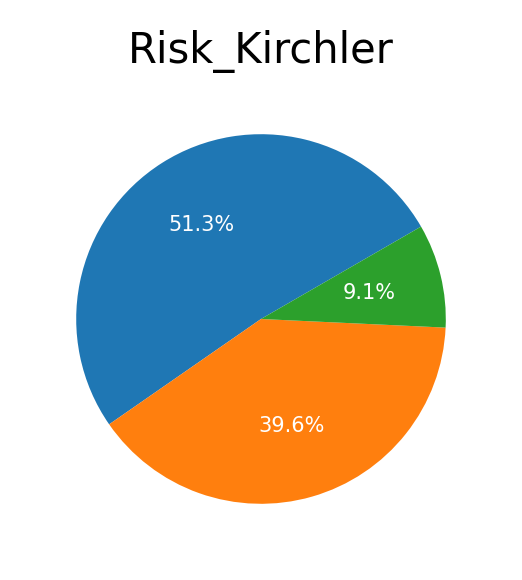

Risk_Guisty
1.0    1808
0.5    1326
0.0     315
Name: count, dtype: int64


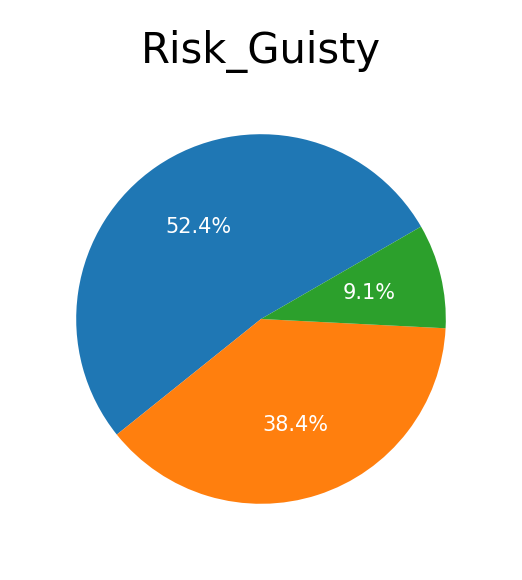

Risk_Smith
1.0    2768
0.0     482
0.5     199
Name: count, dtype: int64


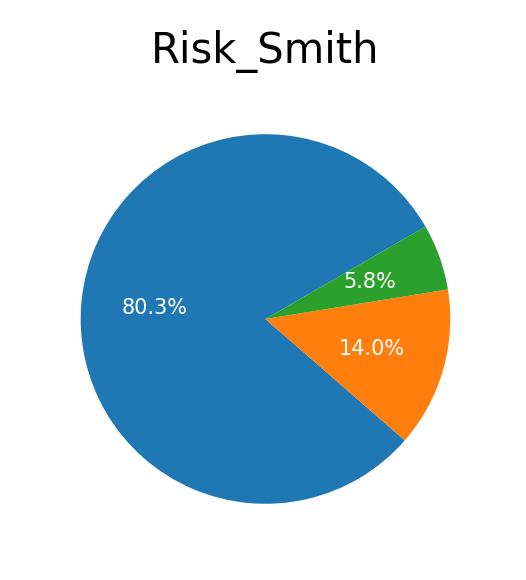



KIRCHLER

session with highest number of max risk
                      session  Risk_Kirchler  count
3  02-07-2024_16.30 (pre LSL)            1.0    145

ssession with highest number of min risk
       session  Risk_Kirchler  count
22  13_11_2024            0.0     35

ssession with highest number of medium risk
             session  Risk_Kirchler  count
54  28-08-2024_15.15            0.5    152


GIUSTY

session with highest number of max risk
                      session  Risk_Guisty  count
33  20-08-2024_13.45(no fMRI)          1.0    142

ssession with highest number of min risk
       session  Risk_Guisty  count
22  13_11_2024          0.0     33

ssession with highest number of min risk
                       session  Risk_Guisty  count
60  29-05-2024_15.30 (pre LSL)          0.5    186

\SMITH

session with highest number of max risk
      session  Risk_Smith  count
9  07_11_2024         1.0    207

ssession with highest number of min risk
                       session  Ri

In [26]:
# Plotting a pie for showing the number of decisions which were risky, medium risky and less risky

for col in ["Risk_Kirchler", "Risk_Guisty", "Risk_Smith"]:
    counts = df_decision_FV[col].value_counts()
    print(counts)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=30, textprops={'fontsize': 5, 'color': 'white'})
    ax.set_title(f"{col}", fontsize=10)
    plt.show()
    plt.close()

# Printing for every Variant sessions with the highest number of min, medium and high risk decisiosn

risk_session_Kirchler = df_decision_FV.groupby("session")["Risk_Kirchler"]
risk_se = risk_session_Kirchler.value_counts().reset_index().sort_values("count", ascending = True)
print("\n\nKIRCHLER")
print("\nsession with highest number of max risk")
print(risk_se[risk_se["Risk_Kirchler"] == 1].tail(1))
print("\nssession with highest number of min risk")
print(risk_se[risk_se["Risk_Kirchler"] == 0].tail(1))
print("\nssession with highest number of medium risk")
print(risk_se[risk_se["Risk_Kirchler"] == 0.5].tail(1))

risk_session_Guisty = df_decision_FV.groupby("session")["Risk_Guisty"]
risk_gu = risk_session_Guisty.value_counts().reset_index().sort_values("count", ascending = True)
print("\n\nGIUSTY")
print("\nsession with highest number of max risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 1].tail(1) )
print("\nssession with highest number of min risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 0].tail(1))
print("\nssession with highest number of min risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 0.5].tail(1))

risk_session_Smith = df_decision_FV.groupby("session")["Risk_Smith"]
risk_gu = risk_session_Smith.value_counts().reset_index().sort_values("count", ascending = True)
print("\n\SMITH")
print("\nsession with highest number of max risk")
print(risk_gu[risk_gu["Risk_Smith"] == 1].tail(1) )
print("\nssession with highest number of min risk")
print(risk_gu[risk_gu["Risk_Smith"] == 0].tail(1))
print("\nssession with highest number of min risk")
print(risk_gu[risk_gu["Risk_Smith"] == 0.5].tail(1))


#Same thing with participant (Showing the participants with the highest, lowest, medium risk)

risk_session_Kirchler = df_decision_FV.groupby("participant")["Risk_Kirchler"]
risk_se = risk_session_Kirchler.value_counts().reset_index().sort_values("count", ascending = True)
print("\participant with highest number of max risk")
print(risk_se[risk_se["Risk_Kirchler"] == 1].tail(1))
print("\participant with highest number of min risk")
print(risk_se[risk_se["Risk_Kirchler"] == 0].tail(1))
print("\participant with highest number of min risk")
print(risk_se[risk_se["Risk_Kirchler"] == 0.5].tail(1))

risk_session_Guisty = df_decision_FV.groupby("participant")["Risk_Guisty"]
risk_gu = risk_session_Guisty.value_counts().reset_index().sort_values("count", ascending = True)
print("\n\nGIUSTY")
print("\participant with highest number of max risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 1].tail(1) )
print("\participant with highest number of min risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 0].tail(1))
print("\participant with highest number of min risk")
print(risk_gu[risk_gu["Risk_Guisty"] == 0.5].tail(1))

risk_session_Smith = df_decision_FV.groupby("participant")["Risk_Smith"]
risk_gu = risk_session_Smith.value_counts().reset_index().sort_values("count", ascending = True)
print("\n\nGIUSTY")
print("\participant with highest number of max risk")
print(risk_gu[risk_gu["Risk_Smith"] == 1].tail(1) )
print("\nparticipant with highest number of min risk")
print(risk_gu[risk_gu["Risk_Smith"] == 0].tail(1))
print("\nparticipant with highest number of min risk")
print(risk_gu[risk_gu["Risk_Smith"] == 0.5].tail(1))

In [27]:
## risk and gender

df_demographics_decision = df_decision_FV.copy()

#Who is more risky (men or women)

for col in ["Risk_Kirchler", "Risk_Guisty", "Risk_Smith"]:
    print("\n\n",col)
    df_demographics_decision[col] = pd.to_numeric(df_demographics_decision[col], errors="coerce")
    avg_risk = df_demographics_decision.groupby("gender")[col].mean()
    print(avg_risk)

    avg_risk.plot(kind="bar", color=["skyblue", "salmon"])
    plt.ylabel(f"Average Risk ([{col}])")
    plt.title("Average Risk by Gender")
    plt.xticks(rotation=0)
    #plt.show()
    plt.close()


    men = df_demographics_decision[df_demographics_decision["gender"] == "Male"][col]
    women = df_demographics_decision[df_demographics_decision["gender"] == "Female"][col].dropna()

    from scipy.stats import ttest_ind

    t, p = ttest_ind(men, women, equal_var=False)
    print(f"t = {t:.3f}, p = {p:.4f}")



 Risk_Kirchler
gender
Female    0.721285
Male      0.705535
Name: Risk_Kirchler, dtype: float64
t = -1.401, p = 0.1614


 Risk_Guisty
gender
Female    0.727711
Male      0.710073
Name: Risk_Guisty, dtype: float64
t = -1.558, p = 0.1194


 Risk_Smith
gender
Female    0.854217
Male      0.818512
Name: Risk_Smith, dtype: float64
t = -2.887, p = 0.0039


In [28]:
CATS = [0, 0.5, 1]  # explicit order

def _counts_per_session(df, col):
    # Make numeric, keep only {0, 0.5, 1}
    dfx = df.copy()
    dfx[col] = pd.to_numeric(dfx[col], errors="coerce").round(2)
    dfx = dfx[dfx[col].isin(CATS)]

    counts = (
        dfx.groupby(["session", col])
           .size()
           .unstack(fill_value=0)
           .reindex(columns=CATS, fill_value=0)  # enforce order
           .sort_index()
    )
    return counts


def plot_heatmap_categorization_clear(df, col, title, path, cmap="viridis"):
    """
    Creates a clean and readable heatmap for categorization counts per session.
    - Modern color map (default: viridis)
    - Text color adapts for contrast
    - Compact and readable layout
    """
    counts = _counts_per_session(df, col)
    if counts.empty:
        raise ValueError(f"No valid values in '{col}'. Expected one of {CATS}.")

    data = counts.values
    cats = list(counts.columns)
    sessions = counts.index.astype(str).tolist()

    n_rows, n_cols = data.shape

    # dynamic figure height
    fig_height = max(4, 0.35 * len(sessions))
    fig, ax = plt.subplots(figsize=(7, fig_height))

    # use pcolormesh instead of imshow to avoid inner lines between cells
    x = np.arange(n_cols + 1)
    y = np.arange(n_rows + 1)
    im = ax.pcolormesh(
        x,
        y,
        data,
        cmap=cmap,
        shading="flat",
        edgecolors="face",  # same color as face -> no visible borders
        linewidth=0
    )

    # cell annotations (centered in each cell)
    vmax = float(np.max(data)) if data.size else 0.0
    threshold = 0.6 * vmax if vmax > 0 else 0  # kept for potential adaptive color
    for i in range(n_rows):
        for j in range(n_cols):
            val = int(data[i, j])
            color = "white"
            ax.text(
                j + 0.5,
                i + 0.5,
                val,
                ha="center",
                va="center",
                fontsize=9,
                color=color,
            )

    # invert y-axis so first session is at the top
    ax.set_xlim(0, n_cols)
    ax.set_ylim(n_rows, 0)

    # ticks at cell centers
    ax.set_xticks(np.arange(n_cols) + 0.5)
    ax.set_xticklabels([str(c) for c in cats], fontsize=10, fontweight="bold")

    ax.set_yticks(np.arange(n_rows) + 0.5)
    ax.set_yticklabels(sessions, fontsize=9)

    ax.set_xlabel("Category", fontsize=11, labelpad=6)
    ax.set_ylabel("Session", fontsize=11, labelpad=6)
    if title:
        ax.set_title(title, fontsize=13, fontweight="bold", pad=10)

    # colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("Number of Observations", fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    # no minor ticks, no additional grid, no frame
    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    # plt.show()
    print(f"✅ Saved: {path}")
    plt.close()


path_heatmap_kirchler = os.path.join(VISUALIZATION, "heatmap_kirchler_categorization_bubble.png")
path_heatmap_guisty   = os.path.join(VISUALIZATION, "heatmap_guisty_categorization_bubble.png")
path_heatmap_smith    = os.path.join(VISUALIZATION, "heatmap_smith_categorization_bubble.png")

# calls
plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Kirchler",
    title="Kirchler – Categorization (Counts per Session)",
    path=path_heatmap_kirchler
)

plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Guisty",
    title="Guisty – Categorization (Counts per Session)",
    path=path_heatmap_guisty
)

plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Smith",
    title="Smith – Categorization (Counts per Session)",
    path=path_heatmap_smith
)


✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_kirchler_categorization_bubble.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_guisty_categorization_bubble.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_smith_categorization_bubble.png


In [29]:
CATS = [0, 0.5, 1]   # explicit order

def _counts_per_session(df, col):
    """
    Count the occurrences of values in `col` per session,
    keeping only values in CATS and enforcing the column order.
    """
    dfx = df.copy()
    dfx[col] = pd.to_numeric(dfx[col], errors="coerce").round(2)
    dfx = dfx[dfx[col].isin(CATS)]
    counts = (
        dfx.groupby(["session", col])
           .size()
           .unstack(fill_value=0)
           .reindex(columns=CATS, fill_value=0)
           .sort_index()
    )
    return counts


def plot_heatmap_categorization_clear(
    df, col, title, path,
    cmap="viridis",
    normalize=True,     # True -> each session as proportion (row sums = 100)
    annot="percent"     # "percent" | "count" | "both"
):
    """
    Plot a heatmap of category proportions (or counts) per session.
    """
    counts = _counts_per_session(df, col)
    if counts.empty:
        raise ValueError(f"No valid values in '{col}'. Expected {CATS}.")

    # Row-normalized percentages per session
    row_sums = counts.sum(axis=1).replace(0, np.nan)
    perc = (counts.div(row_sums, axis=0) * 100).fillna(0)

    data = perc.values if normalize else counts.values
    cats = list(counts.columns)
    sessions = counts.index.astype(str).tolist()

    n_rows, n_cols = data.shape

    # dynamic figure height
    fig_height = max(4, 0.35 * len(sessions))
    fig, ax = plt.subplots(figsize=(7, fig_height))

    # use pcolormesh instead of imshow to avoid inner lines between cells
    x = np.arange(n_cols + 1)
    y = np.arange(n_rows + 1)
    im = ax.pcolormesh(
        x,
        y,
        data,
        cmap=cmap,
        shading="flat",
        edgecolors="face",  # same color as face -> no visible borders
        linewidth=0
    )

    # threshold for adaptive text color
    vmax = float(np.max(data)) if data.size else 0.0
    threshold = 0.6 * vmax if vmax > 0 else 0

    # cell annotations (centered in each cell)
    for i in range(n_rows):
        for j in range(n_cols):
            val_pct = perc.iloc[i, j]
            val_cnt = counts.iloc[i, j]

            if annot == "percent":
                txt = f"{val_pct:.0f}%"
            elif annot == "count":
                txt = f"{int(val_cnt)}"
            else:  # "both"
                txt = f"{val_pct:.0f}%\n({int(val_cnt)})"

            color = "white"
            ax.text(
                j + 0.5,
                i + 0.5,
                txt,
                ha="center",
                va="center",
                fontsize=9,
                color=color
            )

    # put first session at the top
    ax.set_xlim(0, n_cols)
    ax.set_ylim(n_rows, 0)

    # ticks at cell centers
    ax.set_xticks(np.arange(n_cols) + 0.5)
    ax.set_xticklabels([str(c) for c in cats], fontsize=10, fontweight="bold")

    ax.set_yticks(np.arange(n_rows) + 0.5)
    ax.set_yticklabels(sessions, fontsize=9)

    ax.set_xlabel("Category", fontsize=11, labelpad=6)
    ax.set_ylabel("Session", fontsize=11, labelpad=6)
    if title:
        ax.set_title(title, fontsize=13, fontweight="bold", pad=10)

    # colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar_label = "Share per Session (%)" if normalize else "Number of Observations"
    cbar.ax.set_ylabel(cbar_label, fontsize=10)
    cbar.ax.tick_params(labelsize=9)

    # no minor ticks, no extra grid, no frame
    ax.set_xticks([], minor=True)
    ax.set_yticks([], minor=True)
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(path, dpi=300, bbox_inches="tight")
    # plt.show()
    plt.close()
    print(f"✅ Saved: {path}")


saving_path_kirchler = os.path.join(VISUALIZATION, "heamap_RD_Kirchkler_risk_proportion.png")
saving_path_guitsy   = os.path.join(VISUALIZATION, "heamap_RD_Giusty_risk_proportion.png")
saving_path_smith    = os.path.join(VISUALIZATION, "heamap_RD_Smith_risk_proportion.png")

plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Kirchler",
    title="Kirchler – Proportion (with Counts)",
    path=saving_path_kirchler,
    normalize=True, annot="both"
)

plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Guisty",
    title="Guisty – Proportion (with Counts)",
    path=saving_path_guitsy,
    normalize=True, annot="both"
)

plot_heatmap_categorization_clear(
    df_decision_FV, "Risk_Smith",
    title="Smith – Proportion (with Counts)",
    path=saving_path_smith,
    normalize=True, annot="both"
)


✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heamap_RD_Kirchkler_risk_proportion.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heamap_RD_Giusty_risk_proportion.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heamap_RD_Smith_risk_proportion.png


# Volatility

In [30]:
df_plot = df[["session", "round", "price", "V_t", "MAD_t", "AMAD_t", "Vol_Classification_intra_session", "Vol_Classification_Global", "change_price", "deviation_max_min", "abs_diff"]].copy().drop_duplicates().sort_values(["session", "round", "price"])

## Volatility by Kaufmann

df_Kaufmann = df_plot[["session", "round", "price", "V_t", "change_price", "deviation_max_min", "abs_diff"]].copy().drop_duplicates().sort_values(["session", "round", "price"])

sessions = (df_Kaufmann["session"].unique)
sns.set(sytle = "whitegrid")

for sess in sessions:
    



✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_02-07-2024_14.15 (pre LSL)_by_Kaufman.png


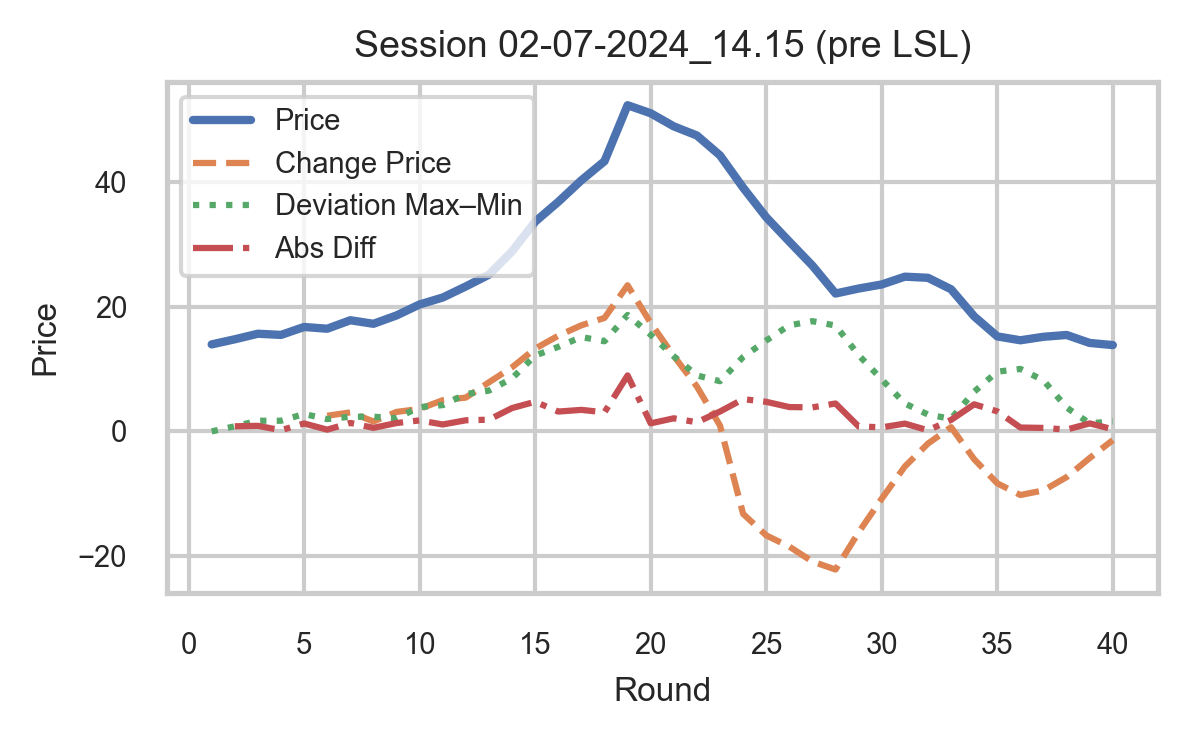

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_02-07-2024_16.30 (pre LSL)_by_Kaufman.png


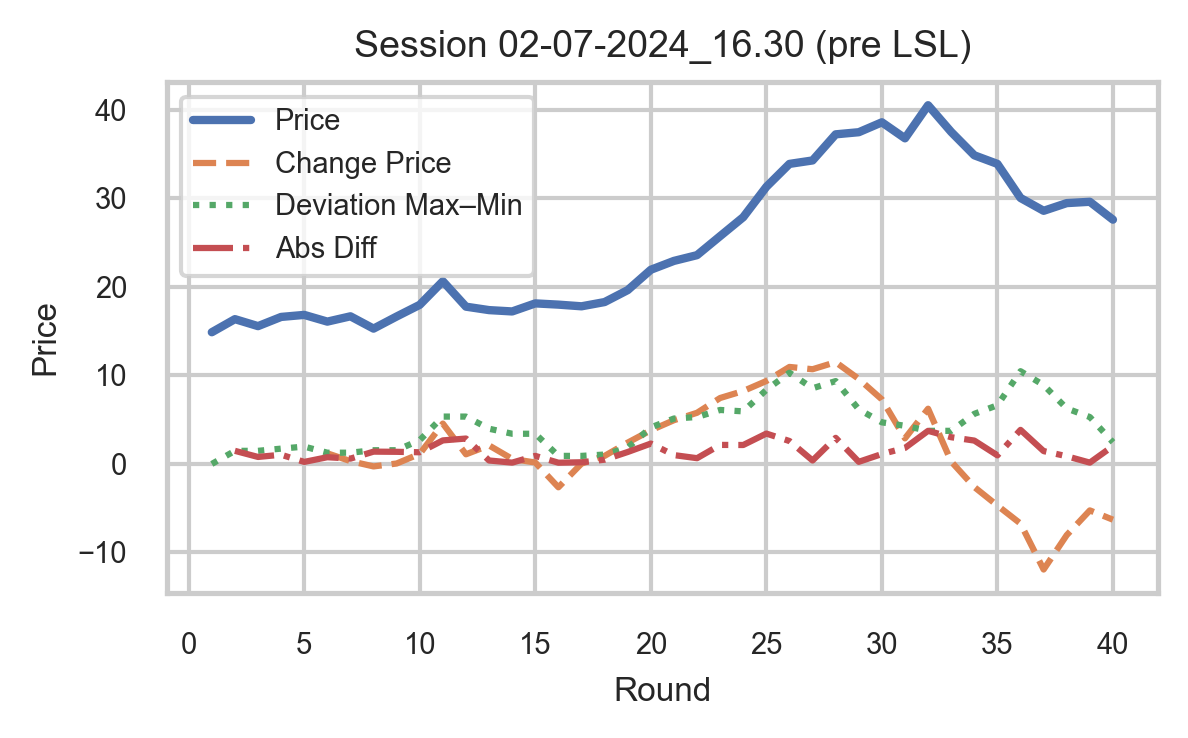

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_03-07-2024_15.15 (pre LSL)_by_Kaufman.png


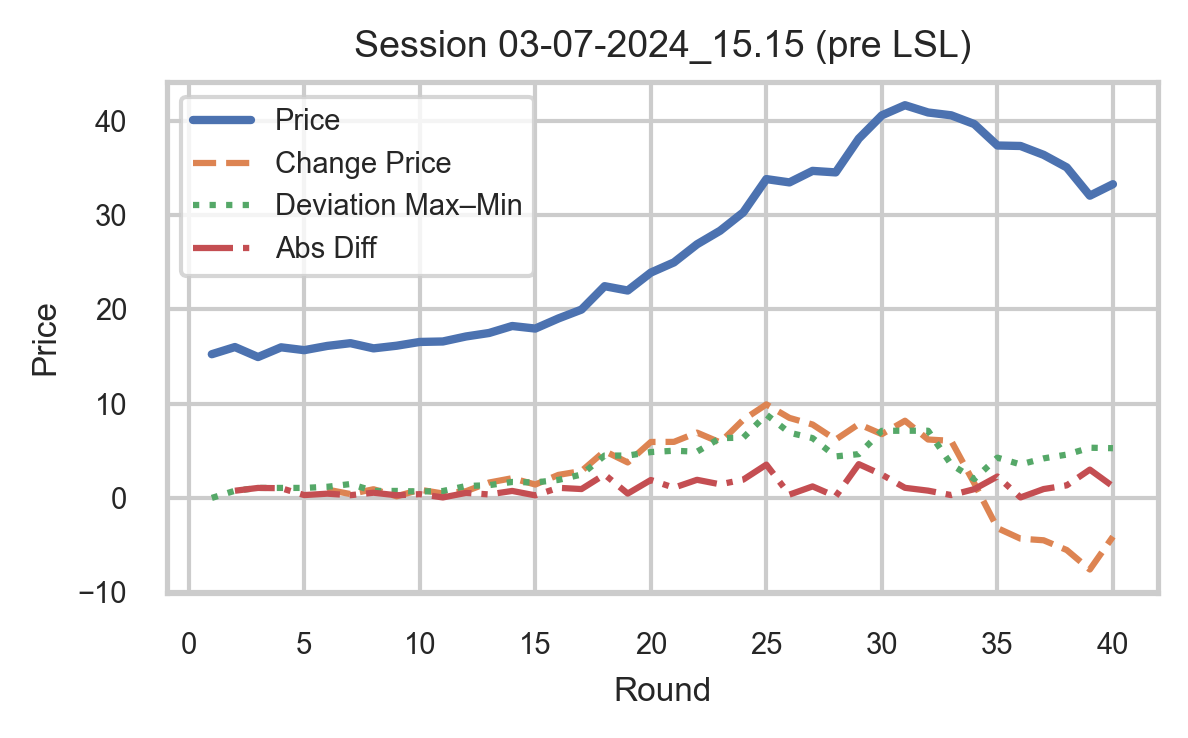

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_06-08-2024_13.15_by_Kaufman.png


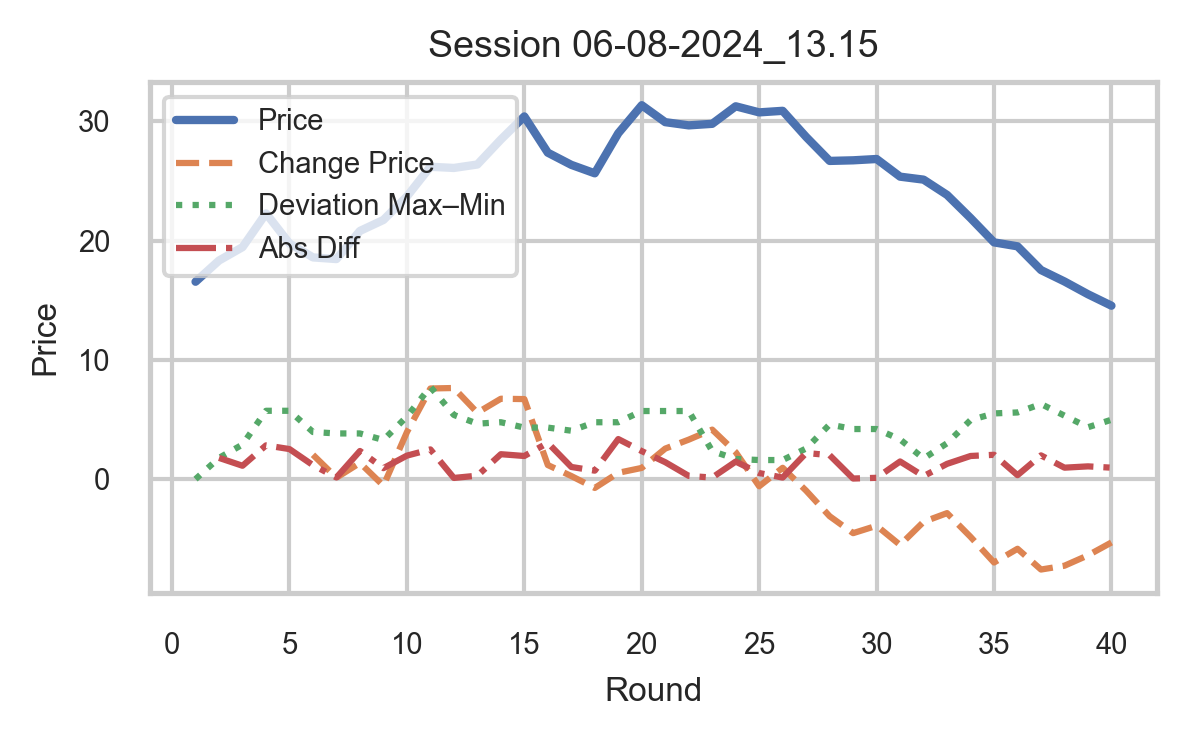

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_07_11_2024_by_Kaufman.png


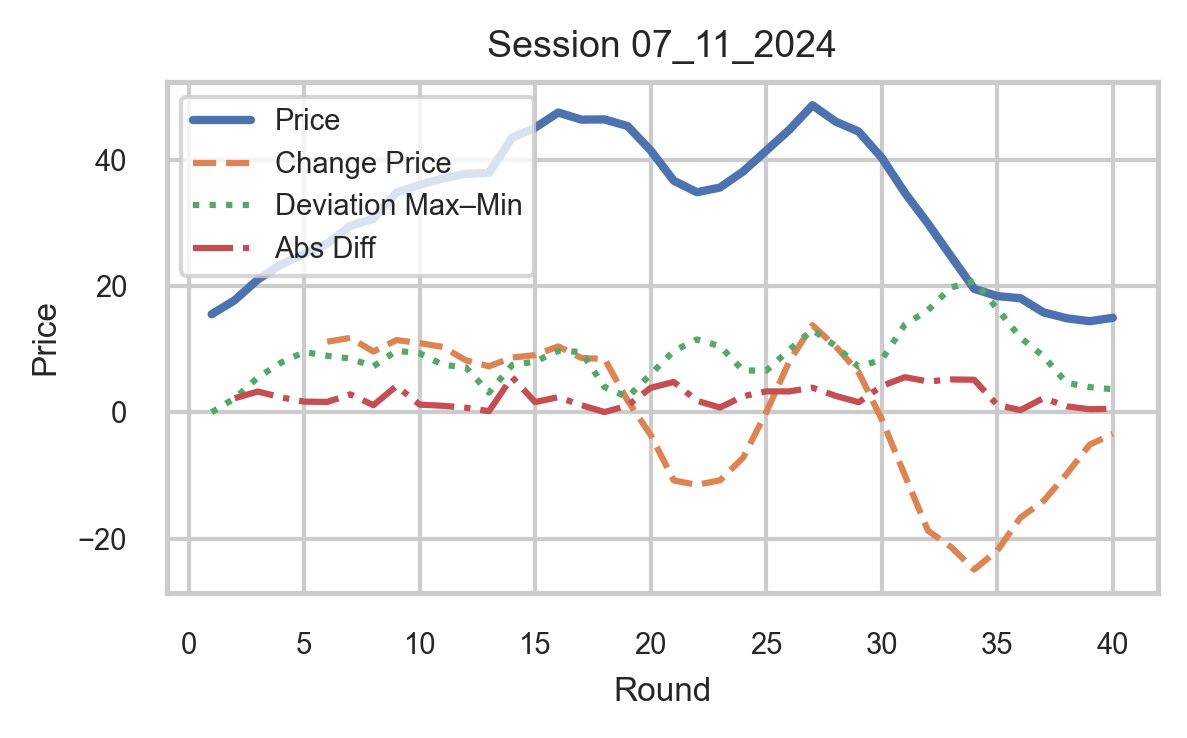

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_12_11_2024_by_Kaufman.png


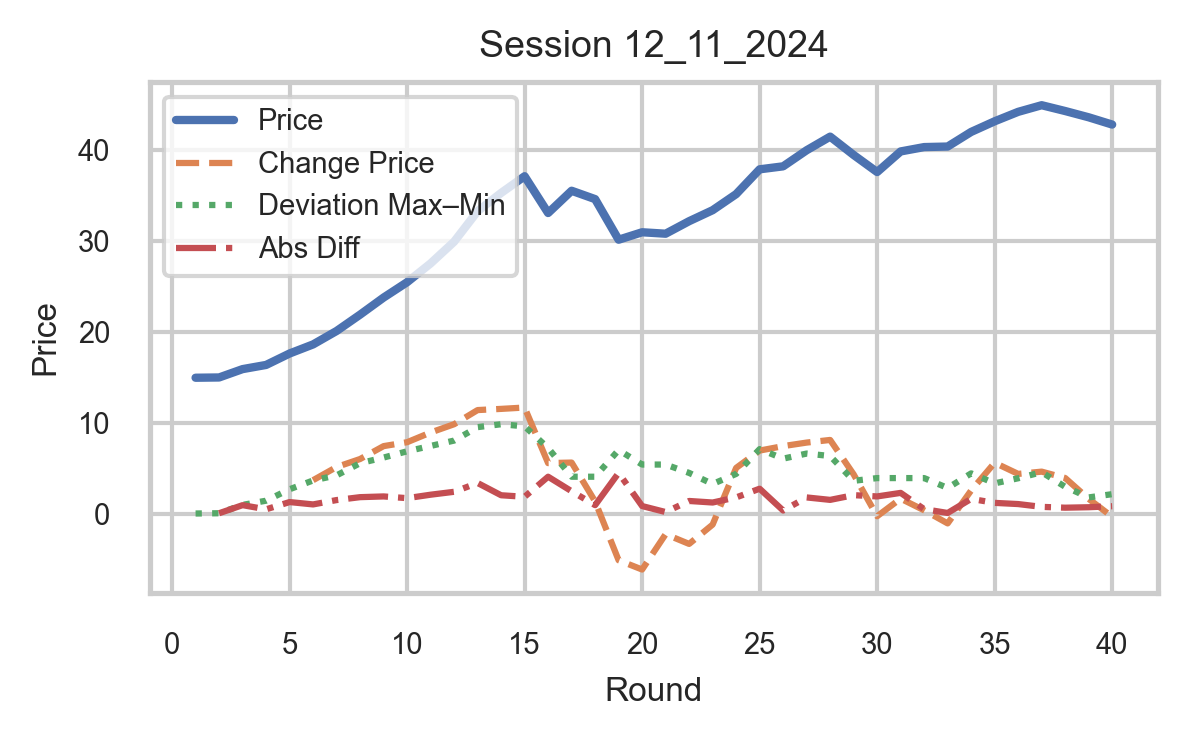

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_13-08-2024_13.45 (No fMRI)_by_Kaufman.png


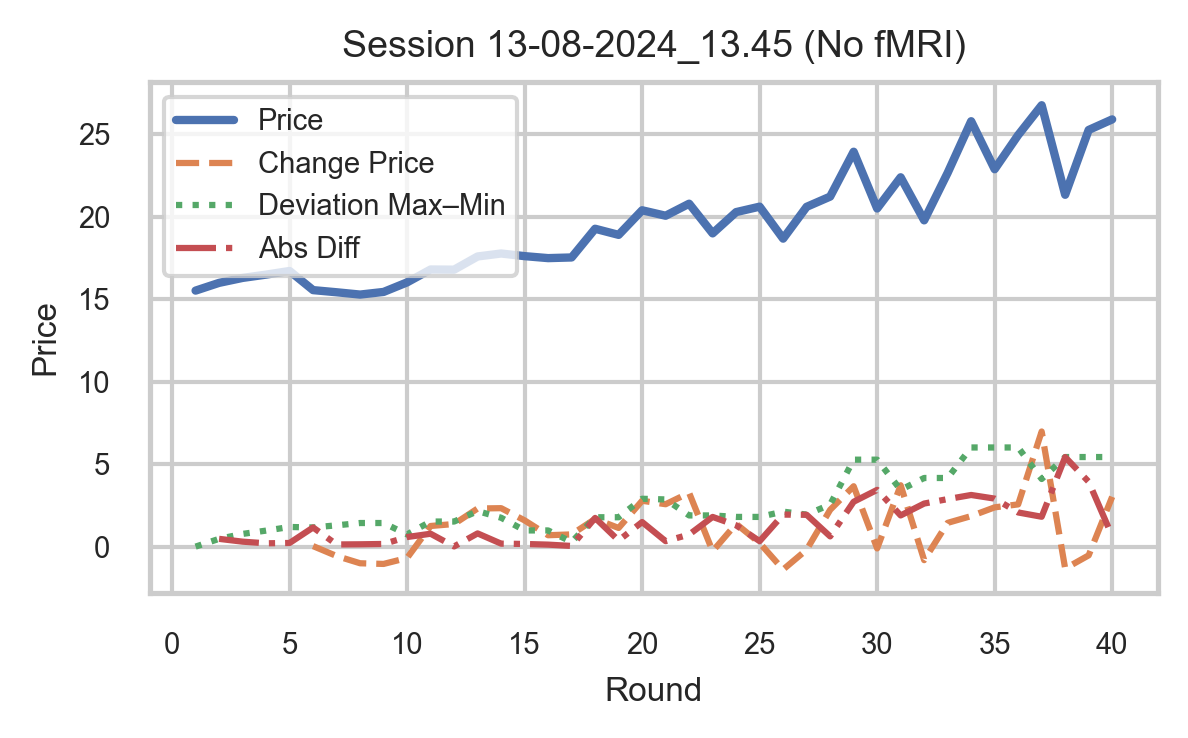

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_13_11_2024_by_Kaufman.png


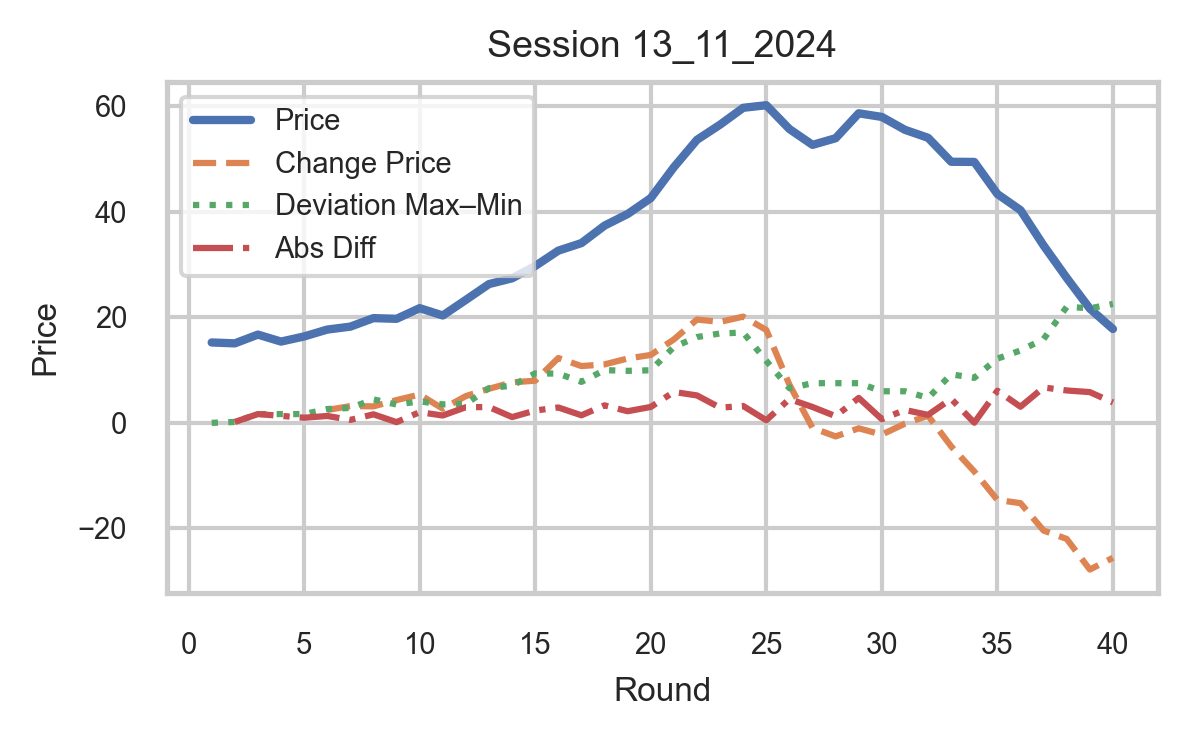

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_14-08-2024_15.15_by_Kaufman.png


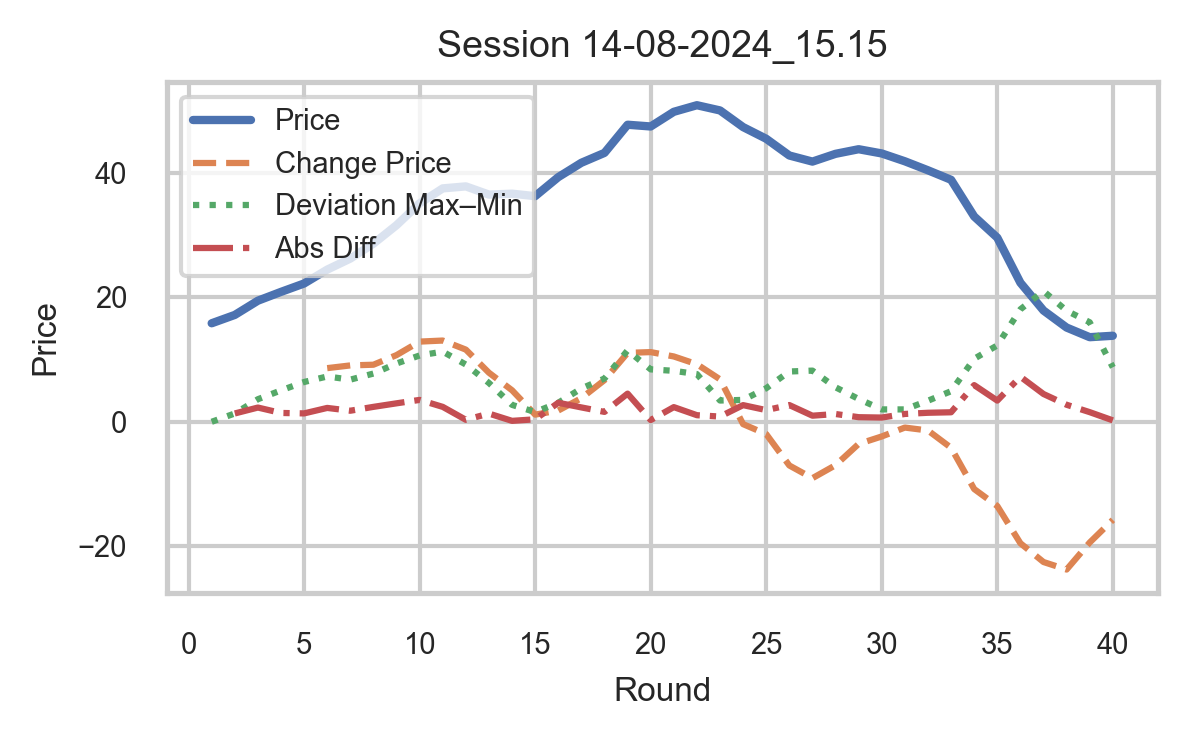

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_14_11_2024_by_Kaufman.png


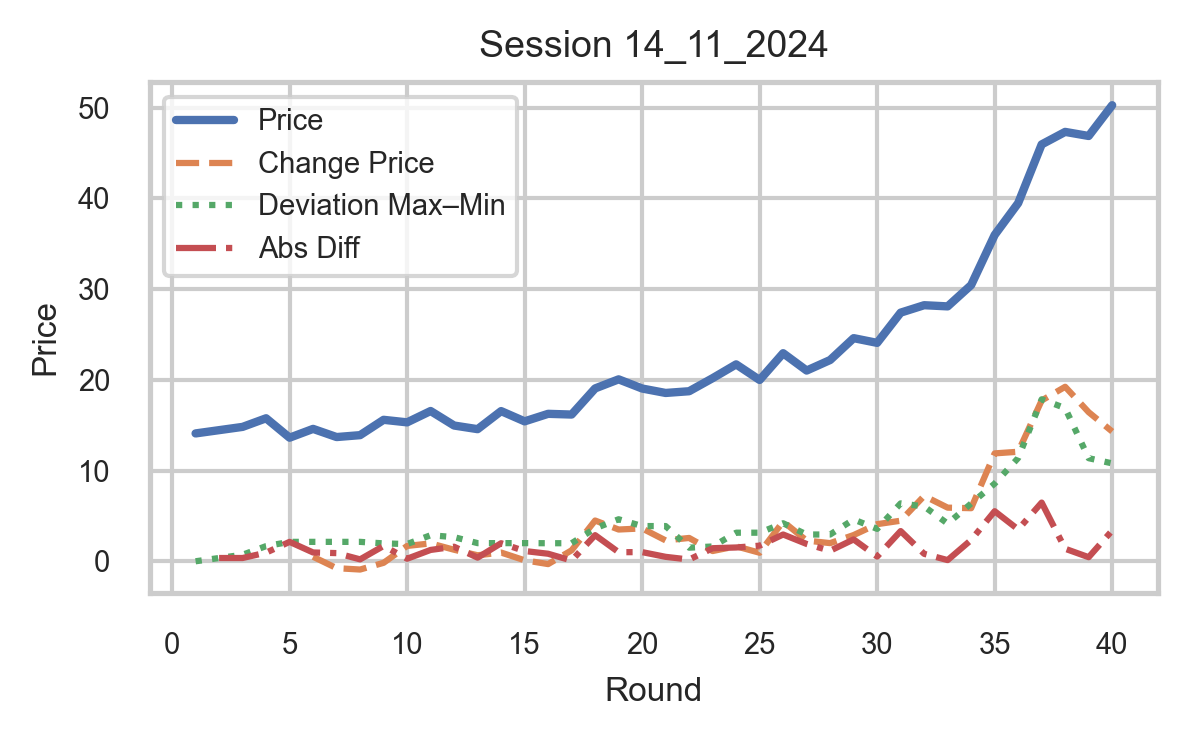

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_19_11_2024_by_Kaufman.png


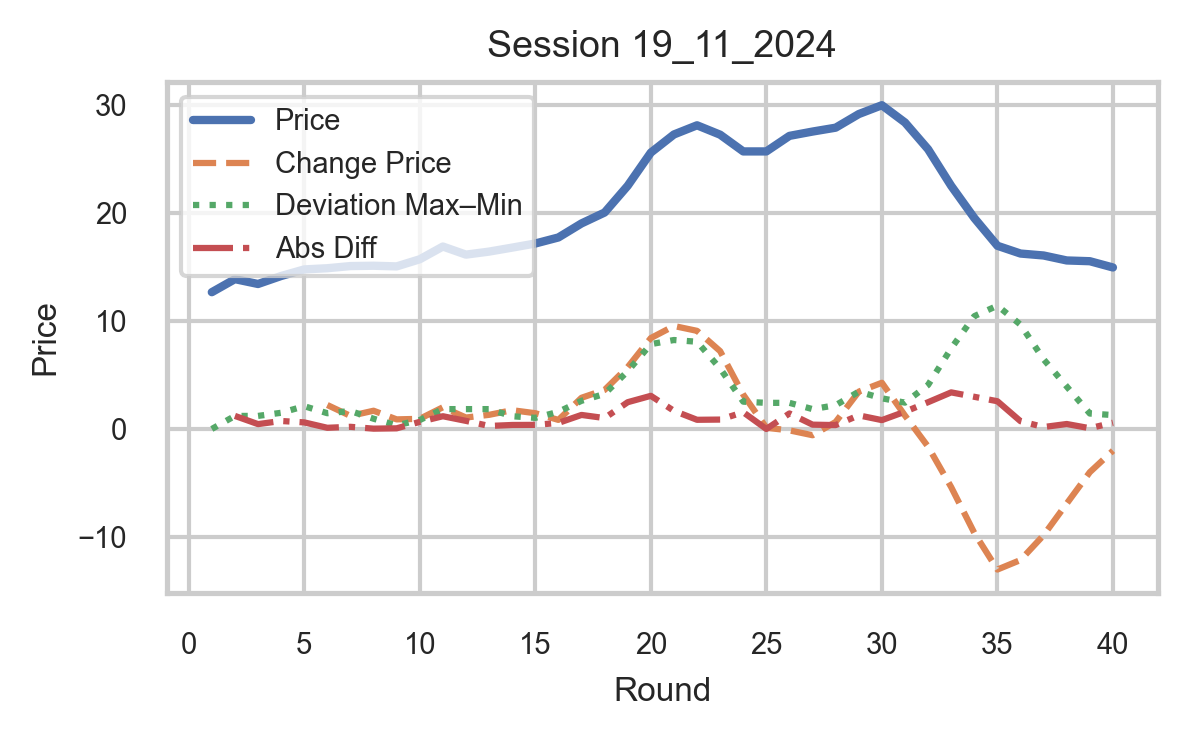

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_20-08-2024_13.45(no fMRI)_by_Kaufman.png


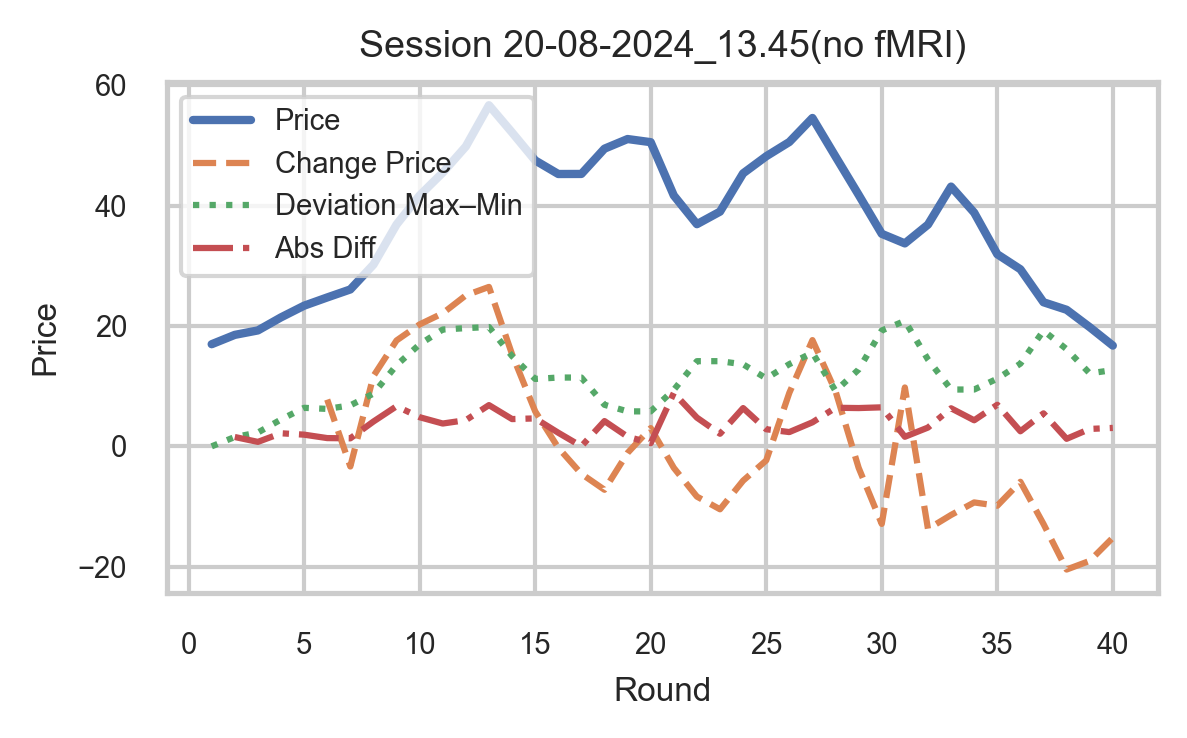

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_20-08-2024_16.15(no fMRI)_by_Kaufman.png


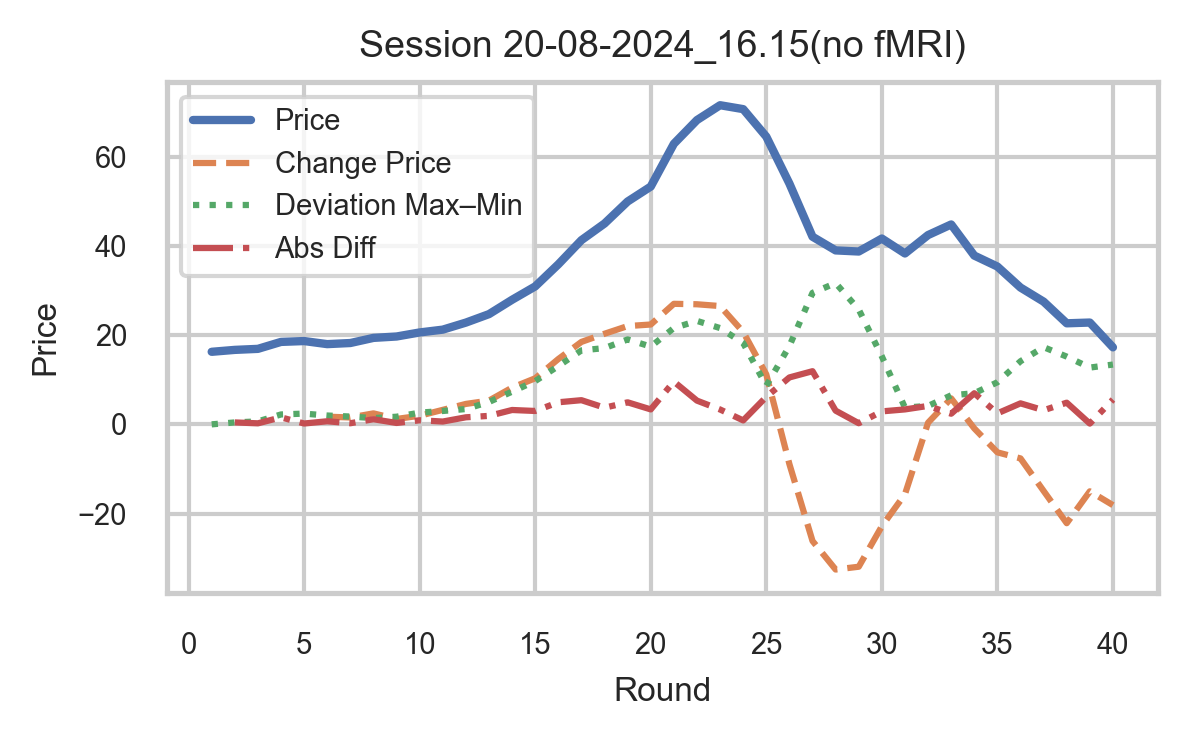

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_21_11_2024 (no fMRI) _by_Kaufman.png


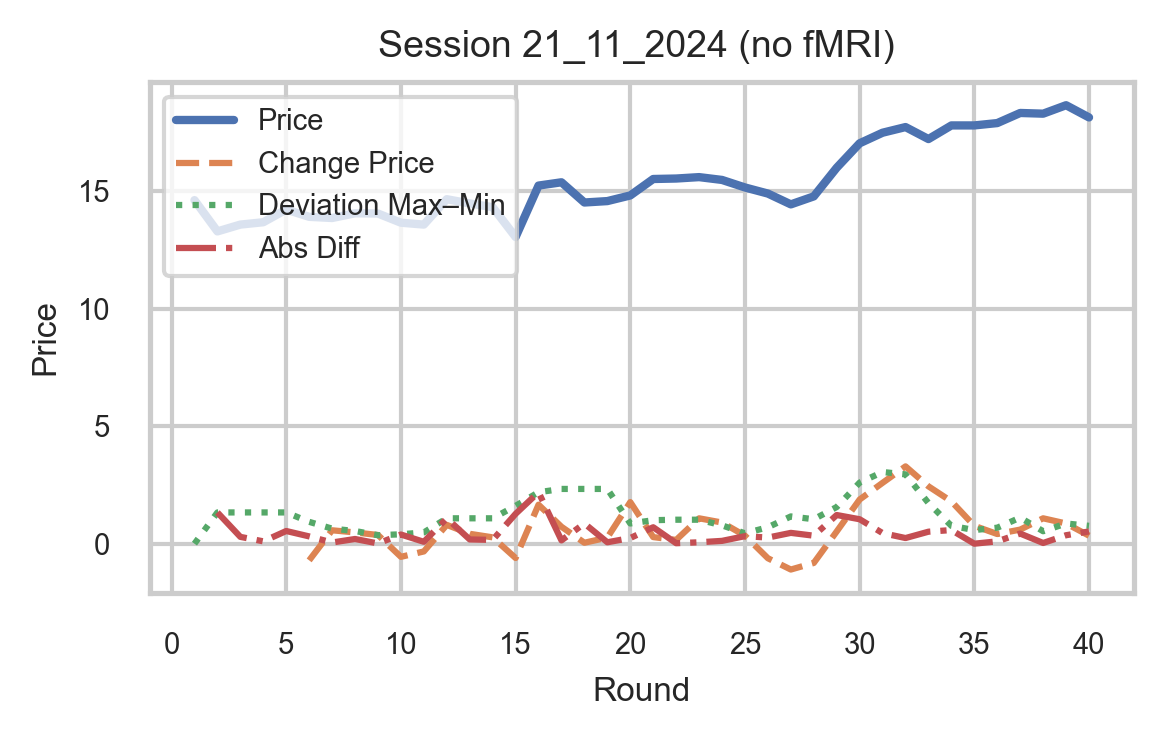

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_27-08-2024_13.45_by_Kaufman.png


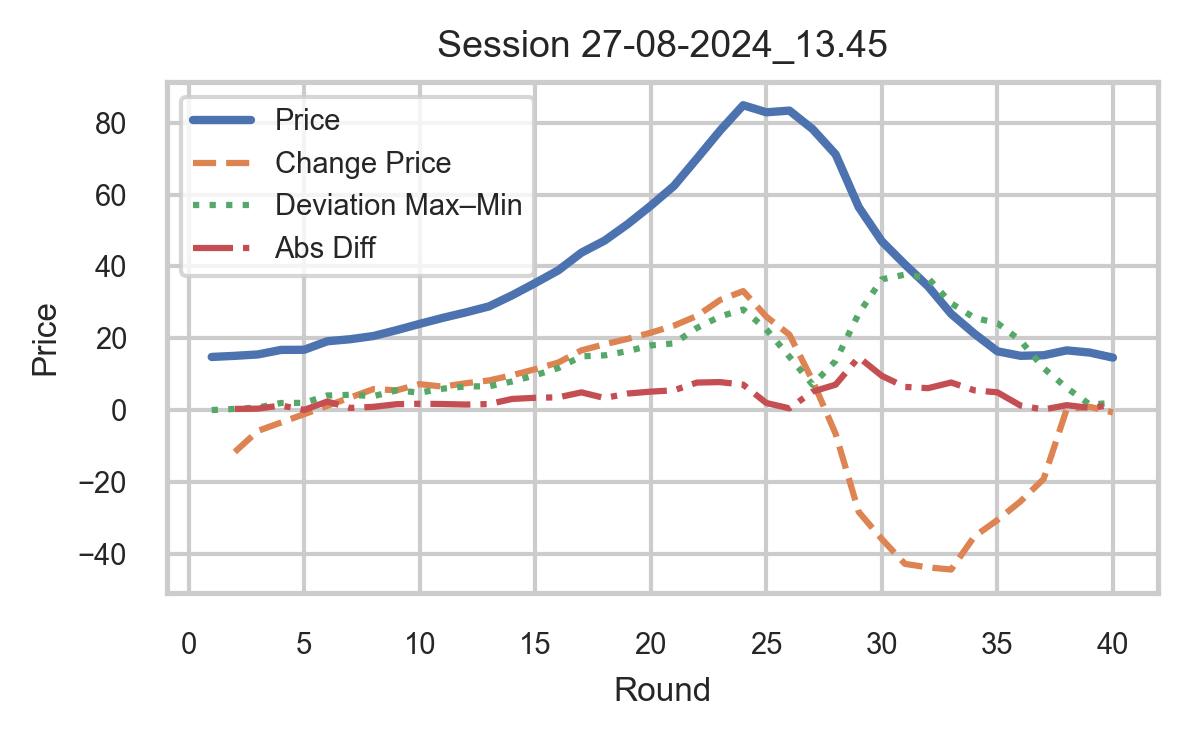

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_27_11_2024_by_Kaufman.png


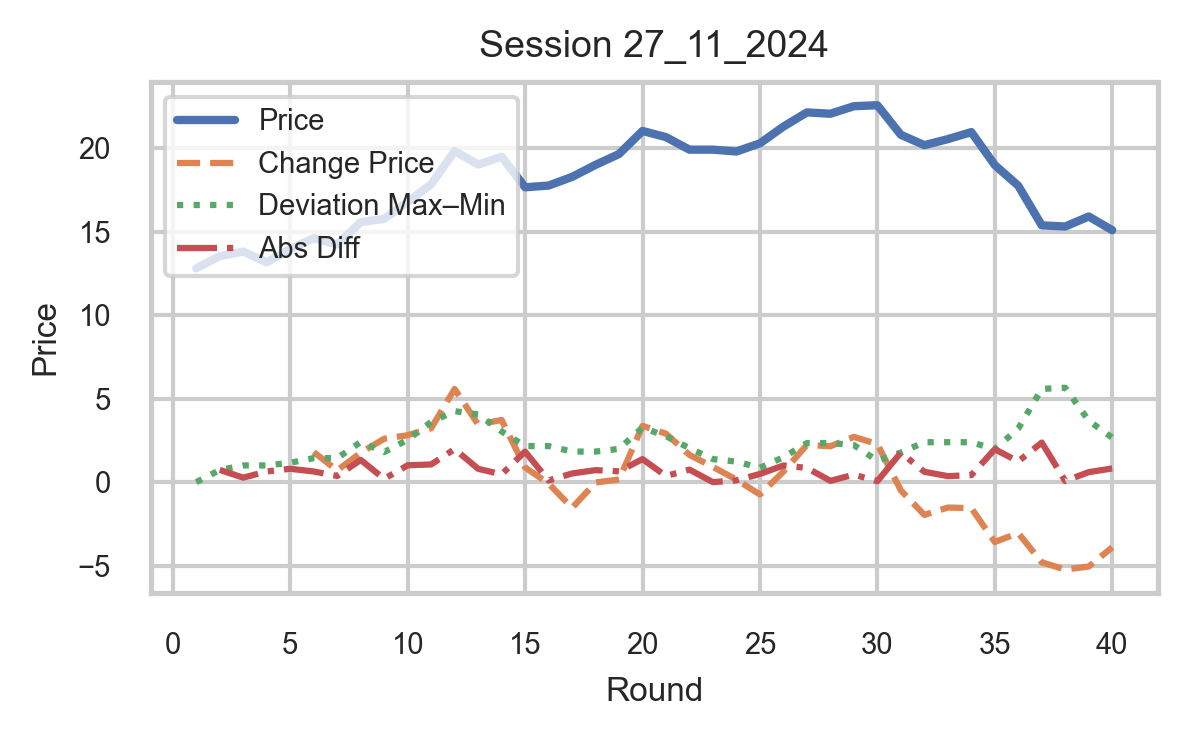

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_28-05-2024_14.30 (pre LSL)_by_Kaufman.png


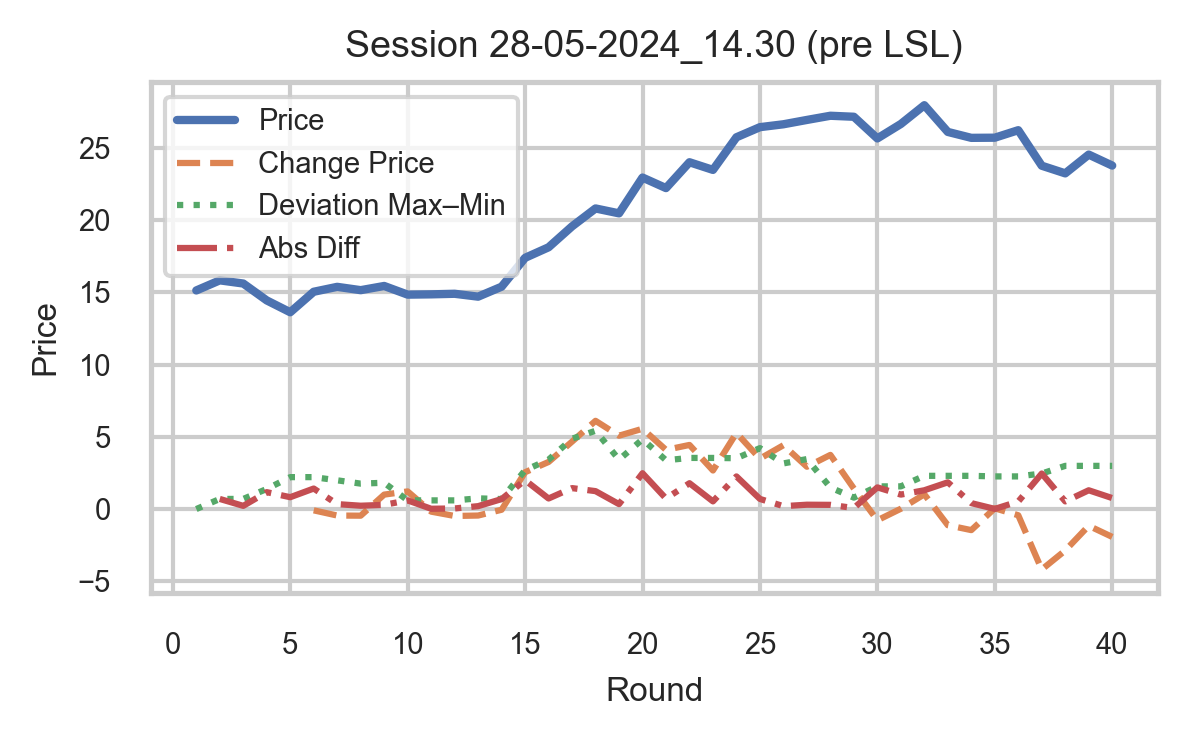

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_28-05-2024_17.15 (pre LSL)_by_Kaufman.png


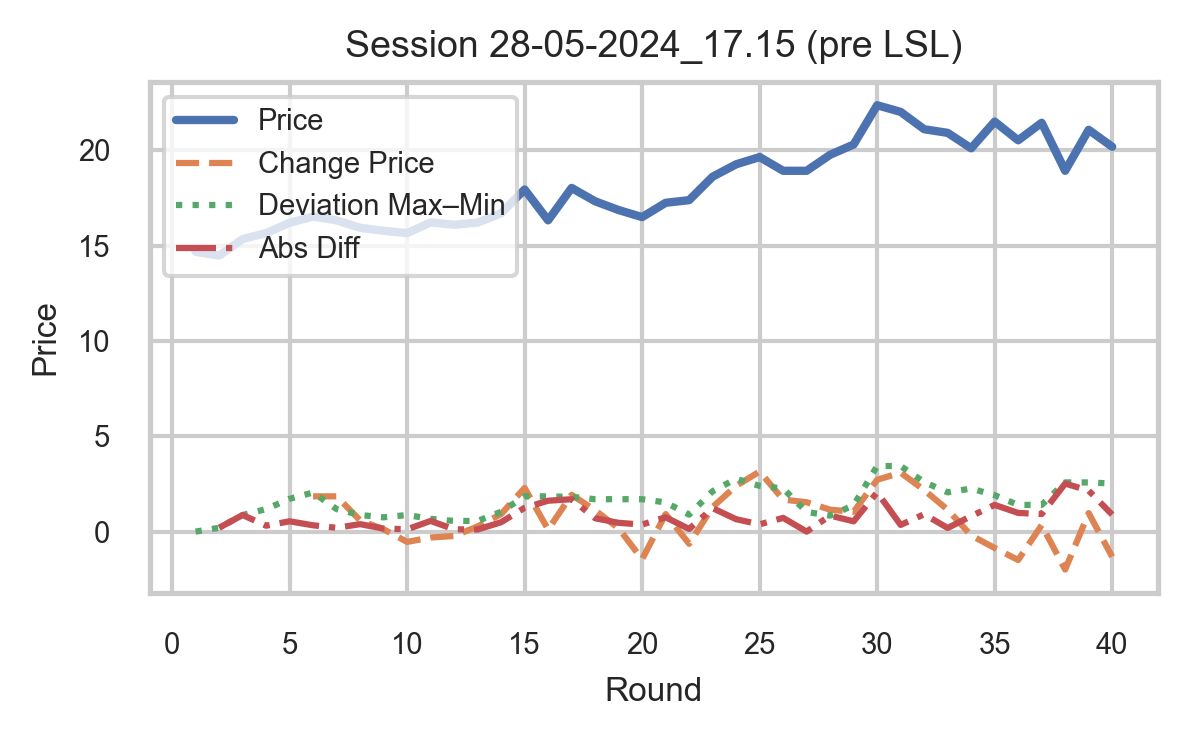

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_28-08-2024_15.15_by_Kaufman.png


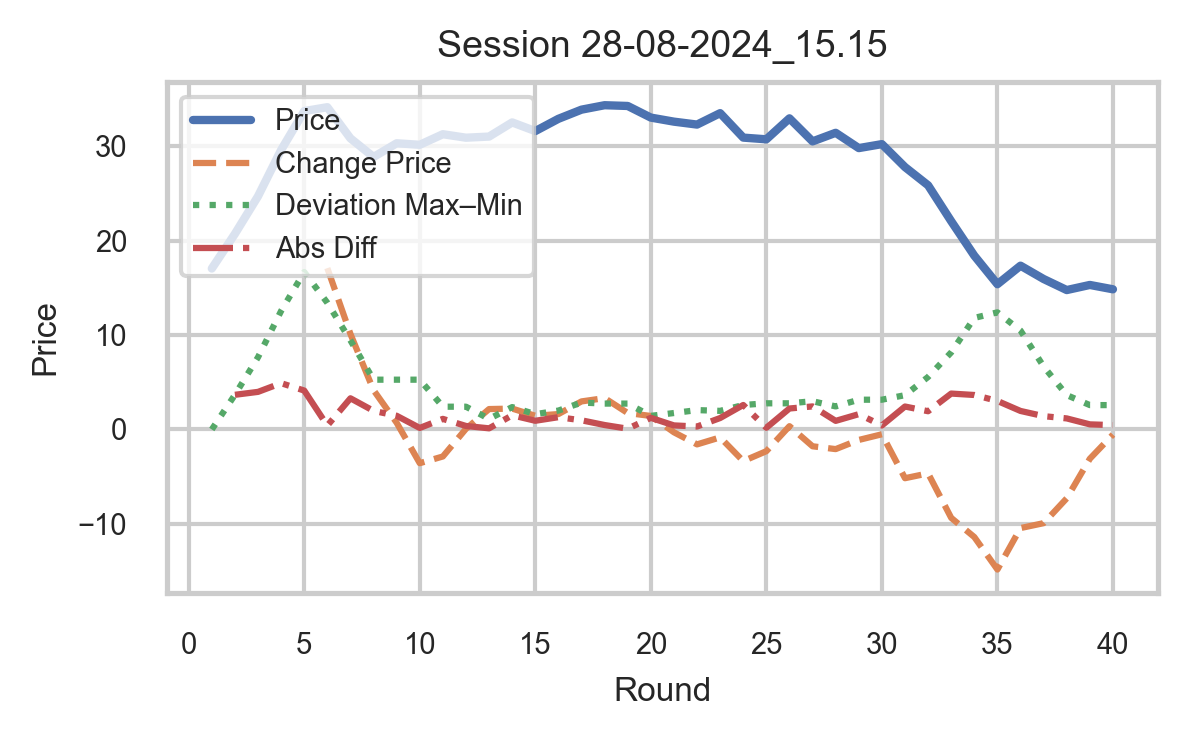

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_28_11_2024_by_Kaufman.png


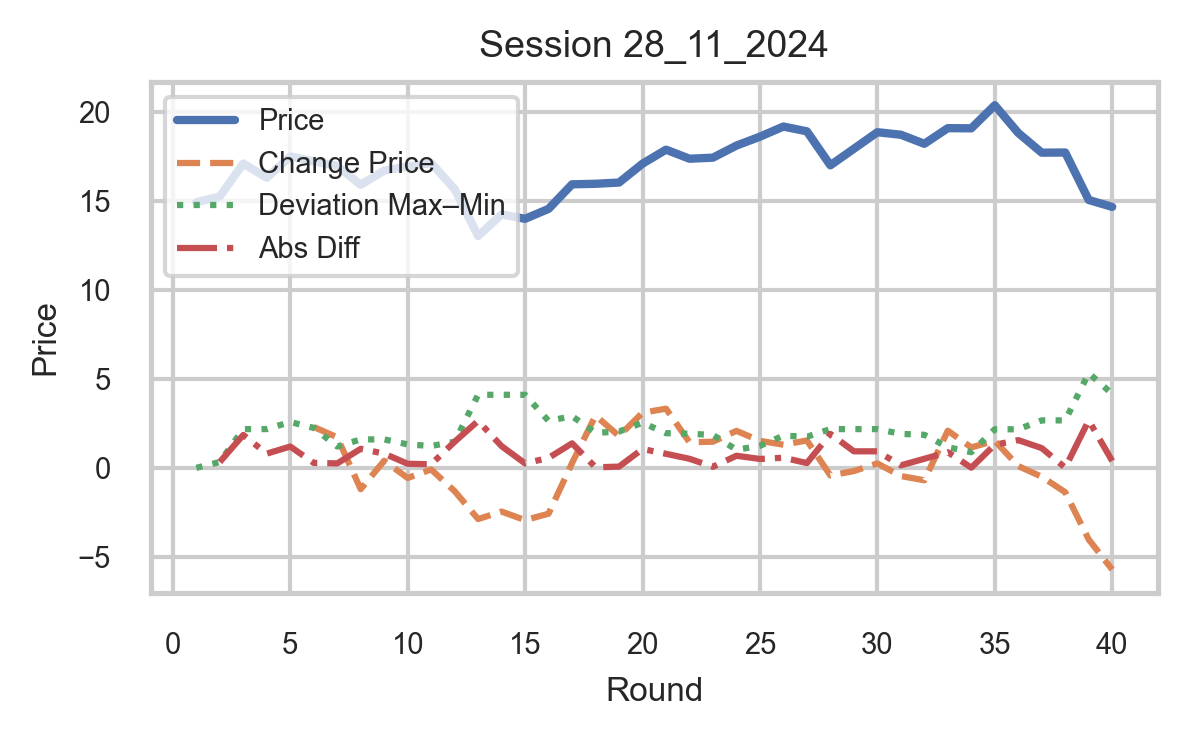

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_Kaufman/Volatility_29-05-2024_15.30 (pre LSL)_by_Kaufman.png


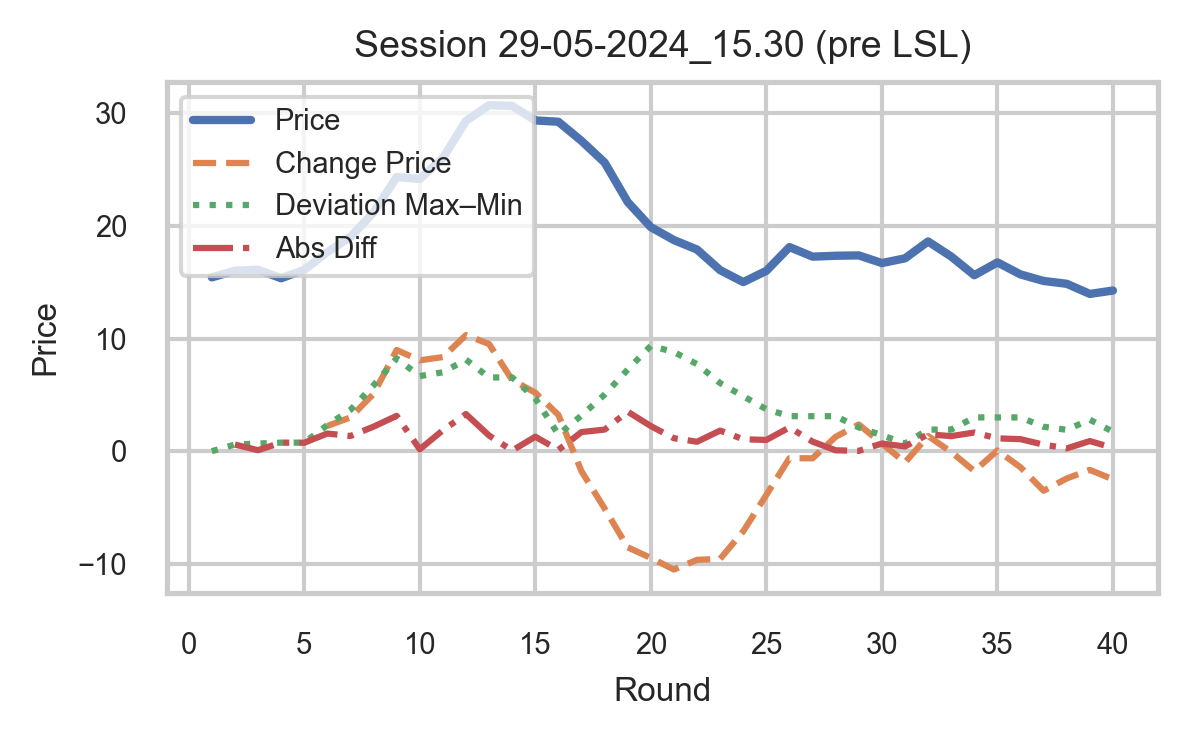

In [31]:

df_Kaufmann = df_plot[["session", "round", "price", "V_t", "change_price", "deviation_max_min", "abs_diff"]].copy().drop_duplicates().sort_values(["session", "round", "price"])


sessions = sorted(df_Kaufmann["session"].unique())

sns.set(style="whitegrid")


for ses in sessions:
    subset = df_Kaufmann[df_Kaufmann["session"] == ses]

    plt.rcParams.update({
    "font.size": 8,
    "axes.titlesize": 9,
    "axes.labelsize": 8,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.fontsize": 7,
})

    fig, ax1 = plt.subplots(figsize=(4, 2.5))
    #ax2 = ax1.twinx() # second y-ax
    plt.title(f"Session {ses}")
    

    sns.lineplot(data=subset, x="round", y="price", ax=ax1, label="Price", linewidth=2)
    sns.lineplot(data=subset, x="round", y="change_price", ax=ax1, label="Change Price", linestyle="--")
    sns.lineplot(data=subset, x="round", y="deviation_max_min", ax=ax1, label="Deviation Max–Min", linestyle=":")
    sns.lineplot(data=subset, x="round", y="abs_diff", ax=ax1, label="Abs Diff", linestyle="-.")

    ax1.set_xlabel("Round")
    ax1.set_ylabel("Price")

    #sns.lineplot(data=subset, x ="round", y ="V_t", ax = ax2, color = "black", label="V_t", linewidth=1) 
    #ax2.set_ylabel("V_t")

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    #lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1, labels_1, loc="upper left")

    plt.tight_layout()
    
    folder = VISUALIZATION / "Volatility_Kaufman"
    os.makedirs(folder, exist_ok=True)
    save_path = folder/ f"Volatility_{ses}_by_Kaufman.png"
    fig.savefig(save_path)
    if os.path.exists(save_path):
        print(f"✅ plot was saved under: {save_path}")
    else: 
        print(f"❌ plot was not saved")
    plt.show()
    plt.close()


In [32]:
# All sessions
sessions = sorted(df_plot["session"].unique())
n_sessions = len(sessions)

# Number of grids per row
cols = 3  
rows = math.ceil(n_sessions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()  

# Each session in a plot
for i, session in enumerate(sessions):
    ax = axes[i]
    data = (
        df_plot[df_plot["session"] == session]
        .groupby("round", as_index=False)["V_t"]
        .mean()
    )
    ax.plot(data["round"], data["V_t"], marker="o", color="steelblue")
    ax.set_title(f"Session {session}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Volatility")
    ax.grid(True)

# Remove empty axes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Volatility by Ederington per Session", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
save_path = VISUALIZATION/ f"Volatility_by_Ederington.png"
fig.savefig(save_path)
if os.path.exists(save_path):
    print(f"✅ plot was saved under: {save_path}")
else: 
    print(f"❌ plot was not saved")
#plt.show()
plt.close()

✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/Volatility_by_Ederington.png


In [33]:


# All sessions
sessions = sorted(df_plot["session"].unique())
n_sessions = len(sessions)

# Number of cells per row
cols = 3
rows = math.ceil(n_sessions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4), sharex=True, sharey=True)
axes = axes.flatten()


for i, session in enumerate(sessions):
    ax = axes[i]
    
    # Caluclating the mean of each session
    data = (
        df_plot[df_plot["session"] == session]
        .groupby("round", as_index=False)[["MAD_t", "AMAD_t"]]
        .mean()
    )

    # plotting: MAD_t
    ax.plot(
        data["round"], data["MAD_t"],
        marker="o", color="steelblue", label="MADₜ"
    )

    # Plot: AMAD_t
    ax.plot(
        data["round"], data["AMAD_t"],
        marker="s", linestyle="--", color="darkorange", label="AMADₜ"
    )

    
    ax.set_title(f"Session {session}")
    ax.set_xlabel("Round")
    ax.set_ylabel("Volatility")
    ax.grid(True)
    ax.legend(fontsize=8)

# remove empty cells
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Volatility (MADₜ vs AMADₜ) per Session", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.97])
save_path = VISUALIZATION/ f"MAD_AMAD_by_Ederington.png"
fig.savefig(save_path)
if os.path.exists(save_path):
    print(f"✅ plot was saved under: {save_path}")
else: 
    print(f"❌ plot was not saved")
#plt.show()
plt.close()


✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/MAD_AMAD_by_Ederington.png


In [34]:
import matplotlib.pyplot as plt
import math

def plot_block(sessions_block, rows, cols, filename):
    fig = plt.figure(figsize=(cols*5, rows*3.2), constrained_layout=True)
    outer_gs = fig.add_gridspec(rows, cols, hspace=0.25, wspace=0.15)

    plt.rcParams.update({
    "font.size": 10,
    "axes.titlesize": 10,
    "axes.labelsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
})

    for idx, session in enumerate(sessions_block):
        r = idx // cols
        c = idx % cols

        inner_gs = outer_gs[r, c].subgridspec(
            2, 1,
            height_ratios=[3, 1],
            hspace=0.01
        )

        ax_vol = fig.add_subplot(inner_gs[0])
        ax_price = fig.add_subplot(inner_gs[1], sharex=ax_vol)

        data = (
            df_plot[df_plot["session"] == session]
            .groupby("round", as_index=False)[["MAD_t", "AMAD_t", "V_t", "price"]]
            .mean()
            .sort_values("round")
        )

        ax_vol.set_ylim(0, 0.15)
        ax_vol.plot(data["round"], data["MAD_t"], label="MAD")
        ax_vol.plot(data["round"], data["AMAD_t"], linestyle="--", label="AMAD")
        ax_vol.plot(data["round"], data["V_t"], linestyle="-.", label="V")
        ax_vol.set_title(f"Session {session}", fontsize=10)
        ax_vol.set_ylabel("Volatility", fontsize=8)
        ax_vol.grid(True)
        ax_vol.legend(fontsize=8, loc="upper left")
        ax_vol.tick_params(labelbottom=False)

        ax_price.plot(data["round"], data["price"], color="black", linewidth=0.8, alpha=0.5)
        ax_price.set_ylabel("Price", fontsize=8)
        ax_price.set_xlabel("Round", fontsize=8)
        ax_price.grid(True)

    fig.suptitle("Volatility per Session (Top Block)", fontsize=14, fontweight="bold")
    fig.savefig(filename, dpi=300, bbox_inches="tight")
    plt.close()
    print("Saved:", filename)


cols = 2
top_rows = 3

sessions = sorted(df_plot["session"].unique())
top_count = top_rows * cols
top_sessions = sessions[:top_count]
bottom_sessions = sessions[top_count:]

bottom_rows = math.ceil(len(bottom_sessions) / cols)

path_top = VISUALIZATION / "volatility_top.png"
path_bottom = VISUALIZATION / "volatility_bottom.png"

plot_block(top_sessions, top_rows, cols, path_top)
plot_block(bottom_sessions, bottom_rows, cols, path_bottom)


Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/volatility_top.png
Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/volatility_bottom.png


In [35]:
# Plotting heatmap:  Frquency of each  Risk Volatility classification

CATS = [0, 0.5, 1]  # explicit order
path_heatmap_vol = os.path.join(VISUALIZATION, "heatmap_volatility_intra_session.png")

plot_heatmap_categorization_clear(
    df_plot, "Vol_Classification_intra_session",
    title="Volatility Risk – Categorization (Counts per Session)",
    path=path_heatmap_vol
)

path_heatmap_vol = os.path.join(VISUALIZATION, "heatmap_volatility_global.png")

plot_heatmap_categorization_clear(
    df_plot, "Vol_Classification_Global",
    title="Volatility Risk – Categorization (Counts per Session)",
    path=path_heatmap_vol
)

✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_volatility_intra_session.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/heatmap_volatility_global.png


# EDA - RD - VOL

In [36]:
FOLDER = VISUALIZATION / "PLOTS_EDA_VOL_RD"
os.makedirs(FOLDER, exist_ok=True)

col = ["session", "participant", "round", "price", "transaction", "window_type", "scr_auc", "scl_mean", "scl_std", "rd_Kirchler_per_round", "rd_GUISTY_per_round", "rd_Smith_per_round", "V_t"]

df_vis = df[col].copy().drop_duplicates().sort_values(["participant", "round"])


window_order = ['pre_decision', 'during_decision', np.nan, 'during_feedback', 'post_feedback']

df_vis["window_num"] = df_vis["window_type"].map({name: i+1 for i, name in enumerate(window_order)})

df_vis["time_index"] = (df_vis["round"] - 1) * len(window_order) + df_vis["window_num"]

df_vis = df_vis.dropna(subset=["V_t"])

In [37]:
participants = sorted(df_vis["participant"].unique())
windows_per_round = 5

for mechanism in ["V_t", "rd_Kirchler_per_round"]:
    print(f"=================={mechanism}==================")
    if mechanism == "V_t":
        new_folder = FOLDER / "EDA_V_t"
    else: 
        new_folder = FOLDER / "EDA_RD_KIRCHLER"
    os.makedirs(new_folder, exist_ok=True)

    for eda in ["scl_mean", "scr_auc"]:
        print(f"=================={mechanism} - {eda} ==================")
        for part in participants:
            subset = df_vis[df_vis["participant"] == part]
            if subset.empty:
                continue

            ses = subset["session"].iloc[0]

            fig, ax1 = plt.subplots(figsize=(8, 5))
            ax2 = ax1.twinx()
            plt.title(f"Participant {part} - {ses}")

            # EDA in red on left axis
            sns.lineplot(
                data=subset,
                x="time_index",
                y=eda,
                ax=ax1,
                label=eda,
                linewidth=2,
                color="red",
                legend=False
            )
            ax1.set_xlabel("Round")
            ax1.set_ylabel(eda)
            ax1.tick_params(axis="y", labelcolor="black")

            # Mechanism in blue on right axis
            sns.lineplot(
                data=subset,
                x="time_index",
                y=mechanism,
                ax=ax2,          
                label=mechanism,
                linewidth=2,
                legend=False
            )
            ax2.set_ylabel(mechanism)
            ax2.tick_params(axis="y", labelcolor="black")

            # x-ticks per round
            n_rounds = subset["round"].max()
            visible_rounds = [r for r in range(1, n_rounds + 1) if r % 2 == 0]
            xticks = [
                (r - 1) * windows_per_round + (windows_per_round / 2)
                for r in visible_rounds
            ]
            xticklabels = [str(r) for r in visible_rounds]
            ax1.set_xticks(xticks)
            ax1.set_xticklabels(xticklabels)

            #ax2.set_ylim(subset[mechanism].min() - subset[mechanism].min() ,subset[mechanism].max()+ subset[mechanism].min())

            # Collect legend entries from both axes
            h1, l1 = ax1.get_legend_handles_labels()
            h2, l2 = ax2.get_legend_handles_labels()
            ax1.legend(h1 + h2, l1 + l2, loc="upper left")

            plt.tight_layout()

            save_path = new_folder / f"{eda}_{mechanism}_{part}.png"
            plt.savefig(save_path, dpi=150)

            if os.path.exists(save_path):
                print(f"✅ plot was saved under: {save_path}")
            else:
                print(f"❌ plot was not saved")

            plt.close()


==================V_t==================
==================V_t - scl_mean ==================
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_V_t/scl_mean_V_t_0b8254y9.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_V_t/scl_mean_V_t_0k5o6enp.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_V_t/scl_mean_V_t_14qogk6l.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_V_t/scl_mean_V_t_18kw7onw.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_V_t/scl_mean_V_t_1ux6p0vs.png
✅ plot was saved under: /Users/johannanagel/Masterarbeit_Programming/output_postfee

In [38]:
# SCL_std, scr_peak in Kombi mit RD_Kirchler_per_group in einem Plot.
needed_participants = ["0b8254yp", "kb7h4pa3", "05i7me5j", "qg17i5kw", "altfgq5z", "bg1msfcf","e0vsk2rw", "hedk3opj"]

col_needed = ["scl_mean", "scr_auc", "rd_Kirchler_per_round"]



participants = sorted(df_vis["participant"].unique())
windows_per_round = 5

# Specify the participants you want to plot
participants_to_plot =  ["0b8254y9", "kb7h4pa3", "05i7me5j", "qg17i5kw", "altfgq5z", "bg1msfcf","e0vsk2rw", "hedk3opj"]   # <--- add your participant IDs here
# Or: to plot all participants, use:
# participants_to_plot = participants

new_folder = FOLDER / "EDA_SCR_SCL_RD_KIRCHLER"
os.makedirs(new_folder, exist_ok=True)

for part in participants_to_plot:
    subset = df_vis[df_vis["participant"] == part].copy()
    if subset.empty:
        continue

    ses = subset["session"].iloc[0]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    plt.title(f"Participant {part} - {ses}")

    # Left axis: scr_auc and scl_std
    sns.lineplot(
        data=subset,
        x="time_index",
        y="scr_auc",
        ax=ax1,
        label="scr_auc",
        linewidth=2, 
        color="black", 
        legend=False
    )
    sns.lineplot(
        data=subset,
        x="time_index",
        y="scl_mean",
        ax=ax1,
        label="scl_mean",
        linewidth=2,
        color="red", 
        legend=False
    )

    ax1.set_xlabel("Round")
    ax1.set_ylabel("SCR / SCL")

    # Right axis: rd_Kirchler_per_round
    sns.lineplot(
        data=subset,
        x="time_index",
        y="rd_Kirchler_per_round",
        ax=ax2,
        label="rd_Kirchler_per_round",
        linewidth=2,
        color="grey", 
        legend=False, 
        linestyle="--"
    )
    ax2.set_ylabel("rd_Kirchler_per_round")

    # Compute x-ticks: one tick per round, placed in the center of each window
    n_rounds = subset["round"].max()
    all_xticks = [
        (r - 1) * windows_per_round + (windows_per_round / 2)
        for r in range(1, n_rounds + 1)
    ]

    # Show only every second round as a visible tick
    visible_rounds = [r for r in range(1, n_rounds + 1) if r % 2 == 0]
    xticks = [
        (r - 1) * windows_per_round + (windows_per_round / 2)
        for r in visible_rounds
    ]
    xticklabels = [str(r) for r in visible_rounds]

    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticklabels)

    # Set y-limits for the right axis based on data range
    ax2.set_ylim(
        subset["rd_Kirchler_per_round"].min(),
        subset["rd_Kirchler_per_round"].max()
    )


    # Merge legends from both axes
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper left")

    plt.tight_layout()

    # Save the plot
    save_path = new_folder / f"scr_scl_rdKirchler_{part}.png"
    plt.savefig(save_path, dpi=150)

    if os.path.exists(save_path):
        print(f"✅ Plot saved at: {save_path}")
    else:
        print(f"❌ Plot was not saved")

    plt.close()



✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_RD_KIRCHLER/scr_scl_rdKirchler_0b8254y9.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_RD_KIRCHLER/scr_scl_rdKirchler_kb7h4pa3.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_RD_KIRCHLER/scr_scl_rdKirchler_qg17i5kw.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_RD_KIRCHLER/scr_scl_rdKirchler_altfgq5z.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_RD_KIRCHLER/scr_scl_rdKirchler_bg1msfcf.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualiz

In [39]:
# SCL_std, scr_peak in Kombi mit RD_Kirchler_per_group in einem Plot.
col_needed = ["scl_mean", "scr_auc", "V_t"]



participants = sorted(df_vis["participant"].unique())
windows_per_round = 5

# Specify the participants you want to plot
participants_to_plot = ["5b1ady1q", "0b8254y9", "1ux6pOvs", "3uuuvlfn", "8jddog36", "ci283zh0","jifdvm", "oyex8tmq"]
# Or: to plot all participants, use:
# participants_to_plot = participants

new_folder = FOLDER / "EDA_SCR_SCL_VOL"
os.makedirs(new_folder, exist_ok=True)

for part in participants_to_plot:
    subset = df_vis[df_vis["participant"] == part].copy()
    if subset.empty:
        continue

    ses = subset["session"].iloc[0]

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax2 = ax1.twinx()
    plt.title(f"Participant {part} - {ses}")

    # Left axis: scr_auc and scl_std
    sns.lineplot(
        data=subset,
        x="time_index",
        y="scr_auc",
        ax=ax1,
        label="scr_auc",
        linewidth=2, 
        color="black", 
        legend=False
    )
    sns.lineplot(
        data=subset,
        x="time_index",
        y="scl_mean",
        ax=ax1,
        label="scl_mean",
        linewidth=2,
        color="red", 
        legend=False
    )

    ax1.set_xlabel("Round")
    ax1.set_ylabel("SCR / SCL")

    # Right axis: rd_Kirchler_per_round
    sns.lineplot(
        data=subset,
        x="time_index",
        y="V_t",
        ax=ax2,
        label="V_t",
        linewidth=2,
        color="grey", 
        legend=False, 
        linestyle="--", 
    )
    ax2.set_ylabel("V_t")

    # Compute x-ticks: one tick per round, placed in the center of each window
    n_rounds = subset["round"].max()
    all_xticks = [
        (r - 1) * windows_per_round + (windows_per_round / 2)
        for r in range(1, n_rounds + 1)
    ]

    # Show only every second round as a visible tick
    visible_rounds = [r for r in range(1, n_rounds + 1) if r % 2 == 0]
    xticks = [
        (r - 1) * windows_per_round + (windows_per_round / 2)
        for r in visible_rounds
    ]
    xticklabels = [str(r) for r in visible_rounds]

    ax1.set_xticks(xticks)
    ax1.set_xticklabels(xticklabels)

    # Set y-limits for the right axis based on data range
    #ax2.set_ylim( subset["V_t"].min(),subset["V_t"].max())


    # Merge legends from both axes
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1 + h2, l1 + l2, loc="upper left")

    plt.tight_layout()

    # Save the plot
    save_path = new_folder / f"scr_scl_vol_{part}.png"
    plt.savefig(save_path, dpi=150)

    if os.path.exists(save_path):
        print(f"✅ Plot saved at: {save_path}")
    else:
        print(f"❌ Plot was not saved")

    plt.close()



✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_5b1ady1q.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_0b8254y9.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_3uuuvlfn.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_8jddog36.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_ci283zh0.png
✅ Plot saved at: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_SCL_VOL/scr_scl_vol_oyex8tmq.png


In [40]:

needed_participants = [
    "0b8254yp", "kb7h4pa3", "05i7me5j", "qg17i5kw",
    "altfgq5z", "bg1msfcf", "e0vsk2rw", "hedk3opj"
]

windows_per_round = 5
TRANSACTION_COL = "transaction"   # column with "buy", "sell", "hold"

new_folder = FOLDER / "EDA_SCR_AUC_DECISION_PER_ROUND"
os.makedirs(new_folder, exist_ok=True)

for part in needed_participants:
    subset = df_vis[df_vis["participant"] == part].copy()
    if subset.empty:
        continue

    # Check required columns
    if TRANSACTION_COL not in subset.columns:
        raise ValueError(f"Missing column '{TRANSACTION_COL}' in df_vis.")

    if "scr_auc" not in subset.columns:
        raise ValueError("Missing column 'scr_auc' in df_vis.")

    subset = subset.sort_values("time_index")
    ses = subset["session"].iloc[0]

    # -------------------------------------------------------
    # Compute 1 value per round: mean SCR-AUC
    # -------------------------------------------------------
    scr_mean_per_round = (
        subset.dropna(subset=["round", "scr_auc"])
              .groupby("round")["scr_auc"]
              .mean()
    )

    decision_per_round = (
        subset.dropna(subset=["round", TRANSACTION_COL])
              .groupby("round")[TRANSACTION_COL]
              .agg(lambda x: x.mode().iloc[0])   # most frequent decision per round
    )

    round_info = (
        pd.DataFrame({
            "decision": decision_per_round,
            "scr_auc_mean": scr_mean_per_round
        })
        .dropna(subset=["scr_auc_mean"])
        .reset_index()
    )

    # X position = center of round window
    round_info["x_center"] = (
        (round_info["round"] - 1) * windows_per_round + (windows_per_round / 2)
    )

    # -------------------------------------------------------
    # Color & marker maps for buy / sell / hold
    # -------------------------------------------------------
    color_map = {"buy": "green", "sell": "red", "hold": "gray"}
    marker_map = {"buy": "^", "sell": "v", "hold": "o"}

    round_info["decision_clean"] = round_info["decision"].map(
        lambda x: x if x in {"buy", "sell", "hold"} else "hold"
    )

    # -------------------------------------------------------
    # Plot
    # -------------------------------------------------------
    fig, ax = plt.subplots(figsize=(8, 5))
    plt.title(f"Participant {part} - {ses}")

    # 1) Plot line of SCR-AUC means per round
    ax.plot(
        round_info["x_center"],
        round_info["scr_auc_mean"],
        color="black",
        linewidth=2,
        marker=None,
        label="scr_auc (round mean)"
    )

    # 2) Plot markers per decision
    for decision in round_info["decision_clean"].unique():
        mask = round_info["decision_clean"] == decision
        ax.scatter(
            round_info.loc[mask, "x_center"],
            round_info.loc[mask, "scr_auc_mean"],
            c=color_map.get(decision, "gray"),
            marker=marker_map.get(decision, "o"),
            edgecolors="black",
            linewidths=0.5,
            s=70,
            label=decision
        )

    ax.set_xlabel("Time index (round centers)")
    ax.set_ylabel("SCR-AUC (round mean)")

    # Optional: x-ticks in round centers (every 2nd round)
    n_rounds = int(subset["round"].max())
    visible_rounds = [r for r in range(1, n_rounds + 1) if r % 2 == 0]
    xticks = [
        (r - 1) * windows_per_round + (windows_per_round / 2)
        for r in visible_rounds
    ]
    ax.set_xticks(xticks)
    ax.set_xticklabels([str(r) for r in visible_rounds])

    # Legend
    legend_handles = [
        Line2D([0], [0], color="black", linewidth=2, label="scr_auc (round mean)")
    ]

    for decision in ["buy", "sell", "hold"]:
        if decision in round_info["decision_clean"].values:
            legend_handles.append(
                Line2D(
                    [0], [0],
                    marker=marker_map[decision],
                    markerfacecolor=color_map[decision],
                    markeredgecolor="black",
                    linestyle="None",
                    markersize=8,
                    label=decision
                )
            )

    ax.legend(handles=legend_handles, loc="upper left")

    plt.tight_layout()

    save_path = new_folder / f"scrAuc_roundMean_decision_{part}.png"
    plt.savefig(save_path, dpi=150)
    print(f"✅ Saved: {save_path}")

    plt.close()


✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_AUC_DECISION_PER_ROUND/scrAuc_roundMean_decision_kb7h4pa3.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_AUC_DECISION_PER_ROUND/scrAuc_roundMean_decision_qg17i5kw.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_AUC_DECISION_PER_ROUND/scrAuc_roundMean_decision_altfgq5z.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_AUC_DECISION_PER_ROUND/scrAuc_roundMean_decision_bg1msfcf.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedback/Main_Part/Visualizations/PLOTS_EDA_VOL_RD/EDA_SCR_AUC_DECISION_PER_ROUND/scrAuc_roundMean_decision_e0vsk2rw.png
✅ Saved: /Users/johannanagel/Masterarbeit_Programming/output_postfeedb